<h1 style="text-align: center;"> Striver - Sliding Window & 2-Pointer Combined Medium & Hard Problems </h1>

# 1. Longest Substring without Repeating Characters :

## Problem Statement :

Given a string, S. Find the Length of the Longest Substring without repeating characters.


### Examples :

**Example 1:**
```
Input : S = "abcddabac"
Output : 4

Explanation : The answer is "abcd" , with a length of 4.
```

**Example 2:**
```
Input : S = "aaabbbccc"
Output : 2

Explanation : The answers are "ab" , "bc". Both have a maximum length of 2.
```

```
Constraints:
1 <= S.length <= 5*10^4
S contains only English lowercase letters.
```

# Brute Force Solution

## Intuition

The idea here is very straightforward - first generate all the possible substrings of given array using 2 for loops. While finding the substrings check if the current character has occured previously with the help of a Hash Array. If so, no need to take this substring into consideration as characters are repeating. Otherwise, calculate the length of the current substring, update maximum length and finally mark the character as visited.

## Approach

* Iterate through the array using a for loop from 0th index to sizeofArray - 1, to take all possible starting points of the substring into consideration.
* Check if the current character is already in the Hash Array, and if so, break out of the loop. Otherwise, as it is not visited yet, mark the character as 1 in the Hash Array, signifying that the current character is now visited.
* Now, calculate the Length of Current Substring and update the Maximum Length of the substrings found so far. Finally, return the Maximum Length.

## Brute Force Python Solution

In [1]:
class Solution:
    def longestNonRepeatingSubstring(self, s):
        # Length of the input string
        n = len(s)
        
        # Variable to store max length
        maxLen = 0
        
        """ Iterate through all possible 
            starting points of the substring """
        for i in range(n):
            
            """ Hash to track characters in 
                the current substring window """
            # Assuming extended ASCII characters
            hash_set = [0] * 256
            
            for j in range(i, n):
                
                """ If s[j] is already in the
                    current substring window """
                if hash_set[ord(s[j])] == 1:
                    break
                
                """ Update the hash_set to mark s[j]
                    as present in the current window """
                hash_set[ord(s[j])] = 1
                
                """ Calculate the length of
                    the current substring """
                current_len = j - i + 1
                
                """ Update maxLen if the current
                    substring length is greater """
                maxLen = max(maxLen, current_len)
        
        # Return the maximum length
        return maxLen

In [2]:
if __name__ == "__main__":
    
    input_str = "cadbzabcd"
    
    # Create an instance of Solution class
    sol = Solution()
    
    length = sol.longestNonRepeatingSubstring(input_str)
    
    # Print the result
    print("Length of longest substring without repeating characters:", length)

Length of longest substring without repeating characters: 5


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($N^2$), where N is the size of the array. This is because we are iterating the array twice using 2 for loops. 

**Space Complexity:**

The Space Complexity will be O(256) since we are using a Hash array to store all the characters.

# Optimal Solution

## Intuition

The idea is to use 2-pointers approach to solve this problem. The 2-pointer technique involves employing two indices, l (left) and r (right), which basically indicates a window starting from l and ending at r. Use a HashSet called set to keep track of characters within the current window (l to r). This allows for efficient checks and ensures no duplicates are present. While checking every window, keep track of the maximum length of subarray encountered so far.

## Approach

* Initialize few variables as: l and r pointers to 0. These pointers will define the current window [l, r] that contains characters without repetition, maxLen to 0 to store the maximum length of substring found without repeating character.
* Use an array hash of size 256 (assuming ASCII characters) to store the last occurrence index of each character in the string. Initialize all elements of hash to -1, indicating that no characters have been encountered yet.
* Now, while r pointer is less than sizeOfArray - 1, iterate in the array. While iterating, check if current character has occured before using Hash array. If so, update the left pointer to index of current character plus 1. This ensures that l moves past the last occurrence of of repeated character, effectively removing the repeated character from the window.
* Calculate the length of the current substring as len = r - l + 1. Update maximum length of the substring found so far.
* Update Hash array with the current index r, indicating the most recent occurrence of character at pointer r in the string. Finally, return maximum length of the substring.

## Dry Run

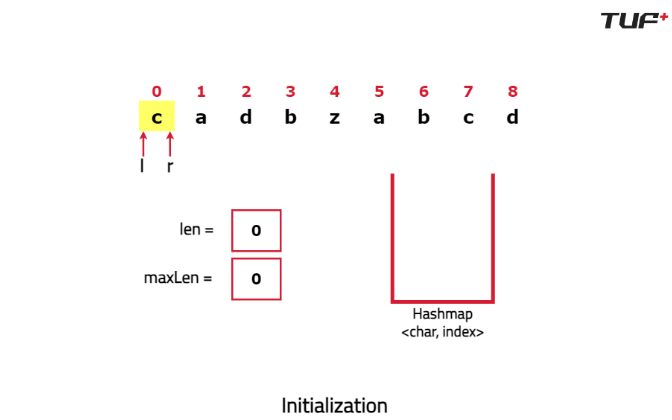
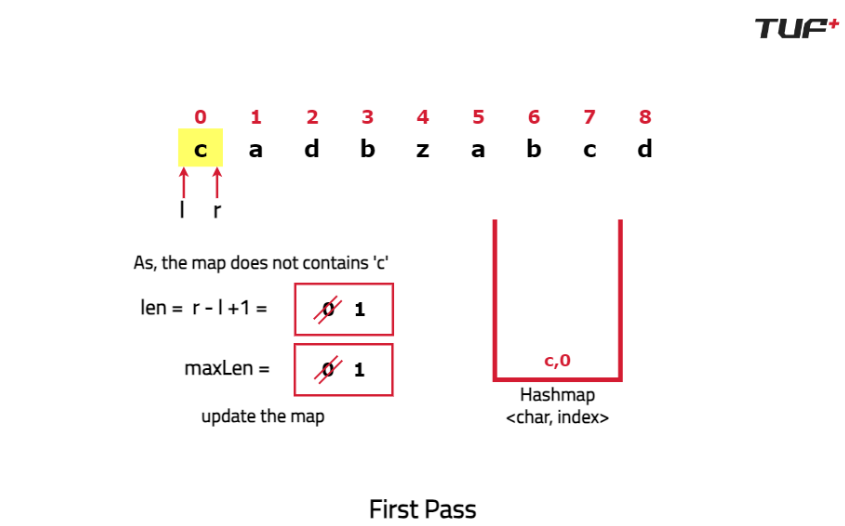
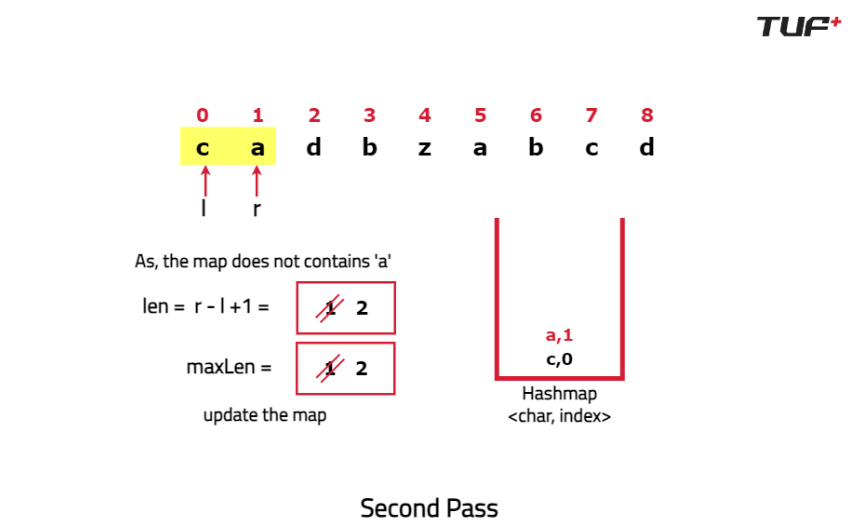
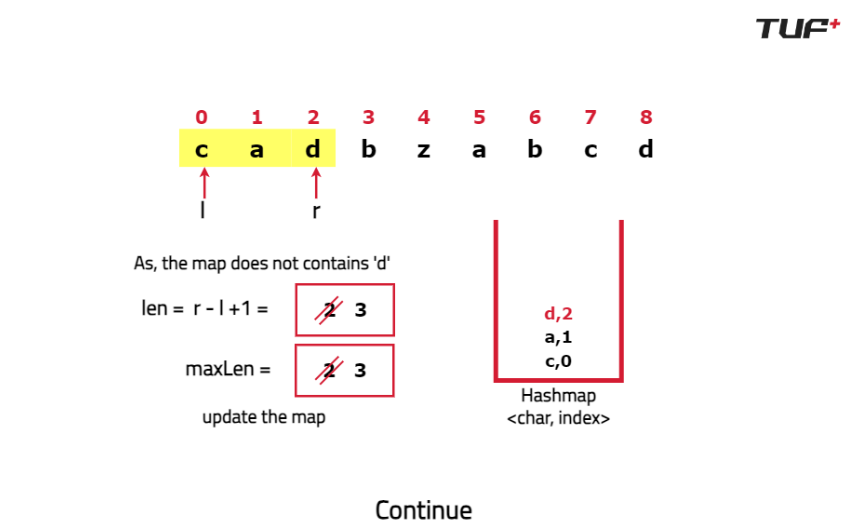
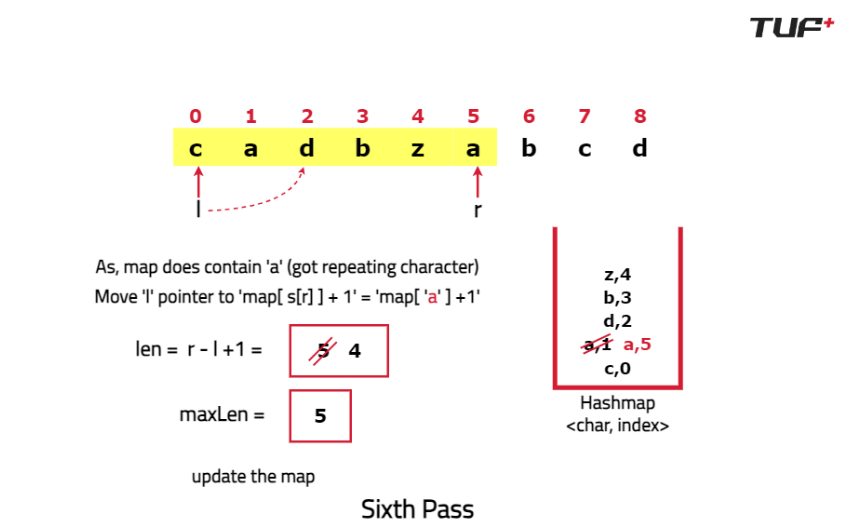
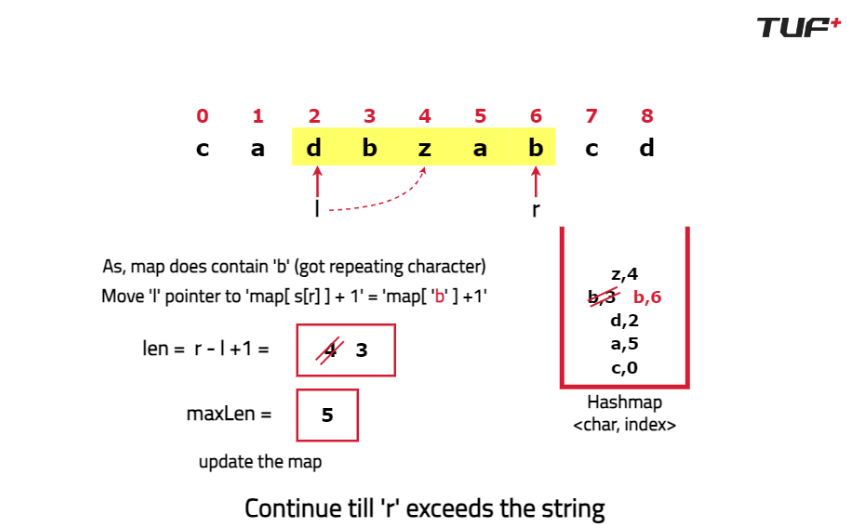

## Optimal Python Solution

In [3]:
class Solution:
    """ Function to find the longest substring
        without repeating characters """
    def longestNonRepeatingSubstring(self, s):
        n = len(s)
        
        # Assuming all ASCII characters
        HashLen = 256
        
        """ Hash table to store last
            occurrence of each character """
        hash = [-1] * HashLen

        l, r, maxLen = 0, 0, 0
        while r < n:
            """ If current character s[r] 
                is already in the substring """
            if hash[ord(s[r])] != -1:
                """ Move left pointer to the right
                    of the last occurrence of s[r] """
                l = max(hash[ord(s[r])] + 1, l)
            
            # Calculate the current substring length
            current_len = r - l + 1
            
            # Update maximum length found so far
            maxLen = max(current_len, maxLen)
            
            """ Store the index of the current
                character in the hash table """
            hash[ord(s[r])] = r
            
            # Move right pointer to next position
            r += 1
        
        # Return the maximum length found
        return maxLen

In [4]:
if __name__ == "__main__":
    s = "cadbzabcd"
    
    # Create an instance of the Solution class
    sol = Solution()

    result = sol.longestNonRepeatingSubstring(s)

    # Output the maximum length
    print("The maximum length is:")
    print(result)

The maximum length is:
5


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), where N is the size of the array as the array runs for N times.
```

**Space Complexity:**
```
The Space Complexity will be O(256) since we are using a Hash array to store all the characters.
```

## FAQs & Interview Follow-ups :

**What happens if the string contains spaces or special characters?**
```
Spaces and special characters are treated like any other character. They can be part of the substring as long as they are not repeated.
```

**Why use the sliding window approach?**
```
The Sliding Window ensures that the algorithm processes each character exactly once, avoiding redundant computations and maintaining a Time Complexity of O(N).
```

**How would you handle a case-insensitive string?**
```
Convert the string to lowercase (or uppercase) before processing to ensure consistency when checking for duplicates.
```

**What if you needed to return the substring itself instead of its length?**
```
Track the starting and ending indices of the longest substring during the traversal. Use these indices to extract the substring after completing the algorithm.
```

# 2. Max Consecutive Ones III :

## Problem Statement :

<b>Given a Binary Array nums and an integer k, flip at most k 0's.</b>

Return the Maximum Number of Consecutive 1's after performing the flipping operation.


### Examples :

**Example 1:**
```
Input : nums = [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0] , k = 3
Output : 10

Explanation :
The Maximum Number of Consecutive 1's are obtained only if we flip the 0's present at position 3, 4, 5 (0 based indexing).
The Array after flipping becomes [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0].
The Number of Consecutive 1's is 10.
```

**Example 2:**
```
Input : nums = [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1] , k = 3
Output : 9

Explanation :
The underlines 1's are obtained by flipping 0's in the new array.
The Array after flipping becomes [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1].
The Number of Consecutive 1's is 9.
```

**Example 3:**
```
Input: s = "openAI is innovative"
Output: "innovative is openAI"

```
```
Constraints:
1 <= nums.length <= 10^5
0 <= nums[i] <= 1
0 <= k <= nums.length
```

# Brute Force Solution

## Intuition

The idea here is to generate all possible substrings of the given array and while doing so, keep a track of all the zeros encountered so far in the substring. If the number of zeros exceeds k then there is no need to consider that substring, or else we can calculate the length of the current substring and update the Maximum Length of Substring.

## Approach

* Iterate the array using a for loop which runs from 0 to sizeOfArray - 1, which indicates the starting point of a substring. Now, initialize a variable zero to 0 to keep track number of zeros found so far in the substring.
* Use another for loop, which basically indicates the ending point of the substring, if the current element is 0, then increase the the variable zero by 1.
* If the number of 0s in the current substring exceeds k then break out of the inner loop, and we do not need to consider such a string. Else, calculate the length of current substring and update the maximum length of substring encountered so far. Finally, return the maximum length of the substring.

## Brute Force Python Solution

In [5]:
class Solution:
    """ Function to find the length of the
    longest substring with at most k zeros"""
    def longestOnes(self, nums, k):
        # Length of the input array
        n = len(nums)
        
        # Maximum length of the substring
        maxLen = 0
        
        """ Variable to count the number
        of zeros in the current window """
        zeros = 0
        
        """ Iterate through all possible 
        starting points of the substring """
        for i in range(n):
            zeros = 0
            
            """ Expand the window from starting
            point i to the end of the array """
            for j in range(i, n):
                if nums[j] == 0:
                    
                    """ Increment zeros count 
                    when encountering a zero """
                    zeros += 1
                
                """ If zeros count is within the 
                allowed limit (k), update maxLen """
                if zeros <= k:
                    
                    # Calculate the length of substring
                    length = j - i + 1
                    maxLen = max(maxLen, length)
                else:
                    break
        
        # Return the maximum length
        return maxLen

In [7]:
if __name__ == "__main__":
    input_arr = [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]
    k = 2
    
    # Create an instance of Solution class
    sol = Solution()
    
    length = sol.longestOnes(input_arr, k)
    
    # Print the result
    print(f"Length of longest substring with at most {k} zeros flipped: {length}")

Length of longest substring with at most 2 zeros flipped: 6


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($N^2$), where N is the size of the array. This is because for every element of the array the inner loop runs for N times.

**Space Complexity:**

The Space Complexity will be O(1) as no extra space is being used.

# Better Solution

## Intuition

The idea here is to use Sliding Window technique to solve this problem in Linear Time. The Sliding Window Technique is chosen because it efficiently manages a window within the input array that meets a specific criteria. It dynamically adjusts the size and position of the window based on the number of zeros encountered to ensure that the number of zeros are less than and equal to k.

## Approach

* First, initialize few variables as : l and r as pointers to the left and right ends of the window respectively, both starting at the beginning of the array nums. zeros is the variable to keep track of the number of zeros encountered within the current window and maxLen is to store the maximum length of the substring found so far.
* Use a Sliding Window approach where r moves from the start to the end of the array nums. Check if current element in the array is 0. If yes, increment the zeros count.
* While zeros exceeds k, adjust the window by moving l to the right until zeros is less than or equal to k. This ensures that the window contains at most k zeros.
* If number of zero is less than or equal to k then calculate the length of the substring. Update maximum length of sustring to keep track of the maximum length encountered during the iteration and finally, return it.

## Better Python Solution

In [8]:
class Solution:
    """ Function to find the length of the
    longest substring with at most k zeros """
    def longestOnes(self, nums, k):
        
        # Length of the input array
        n = len(nums)
        
        # Pointers for sliding window approach
        l, r = 0, 0
        
        """ Variables to count zeros
        and store maximum length """
        zeros, maxLen = 0, 0
        
        """ Iterate through the array 
        using sliding window approach """
        while r < n:
            if nums[r] == 0:
                
                """ Increment zeros count 
                when encountering a zero """
                zeros += 1  
            while zeros > k:
                if nums[l] == 0:
                    
                    """ Decrement zeros count
                    when moving left pointer """
                    zeros -= 1 
                
                """ Move left pointer to the
                right to shrink the window """
                l += 1  
            
            """ Calculate the length 
            of current substring """
            length = r - l + 1
            
            """ Update maxLen if the current
            substring length is greater """
            maxLen = max(maxLen, length)
            
            """ Move right pointer 
            to expand the window """
            r += 1  
        
        # Return the maximum length
        return maxLen

In [10]:
if __name__ == "__main__":
    
    input_arr = [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]
    k = 2  
    
    # Create an instance of Solution class
    sol = Solution()
    
    length = sol.longestOnes(input_arr, k)
    
    # Print the result
    print(f"Length of longest substring with at most {k} zeros flipped: {length}")

Length of longest substring with at most 2 zeros flipped: 6


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(2N), where N is the size of the array. This is because the outer and the inner loop is running for N times each.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no extra space is being used.
```

# Optimal Solution

## Intuition

The idea here is to employ the Sliding Window approach efficiently by avoiding the additional O(N) Time Complexity incurred when shifting the window entirely in the better solution, to ensure that the Total Number of zeros does not exceed k. <b>Instead of moving the left pointer (l) to eliminate excess zeros completely, shift the window by one position at a time. This method ensures that the problem can be solved in O(N) time complexity only. </b>

## Approach

* First, initialize few variables as: l and r as pointers, where l marks the left boundary and r marks the right boundary of the Sliding Window. zeros is the variable to count the number of zeros encountered within the current window, whereas maxLen is to store the Maximum Length of valid Substrings found.
* Use the r pointer to traverse through the array. For each element, check if it is 0. If so, increment the zeros count because we are adding one more zero to the current window.
* After incrementing zeros, check if zeros exceeds the allowed limit k. If so, adjust the window by moving the l pointer to the right until the window contains at most k zeros (zeros <= k). Decrement the zeros count accordingly when the element pointed by l is 0 and increment l.
* Whenever zeros is less than or equal to k, calculate the length of the current substring. Update maxLen to store the maximum length encountered so far among all valid substrings. Move r pointer by 1. Finally, return maxLen variable.

## Dry Run

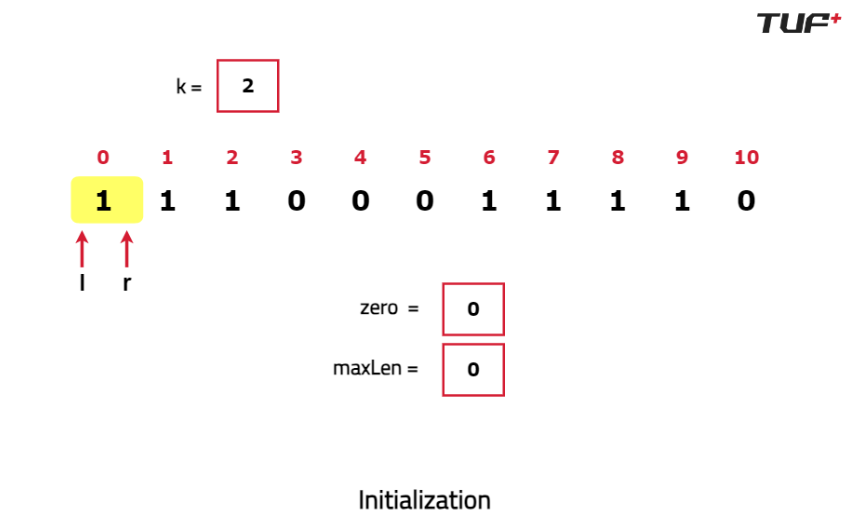
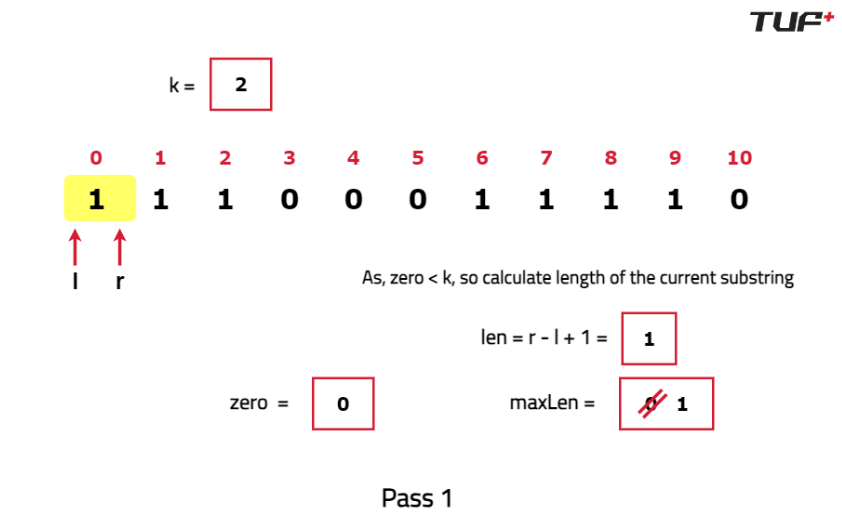
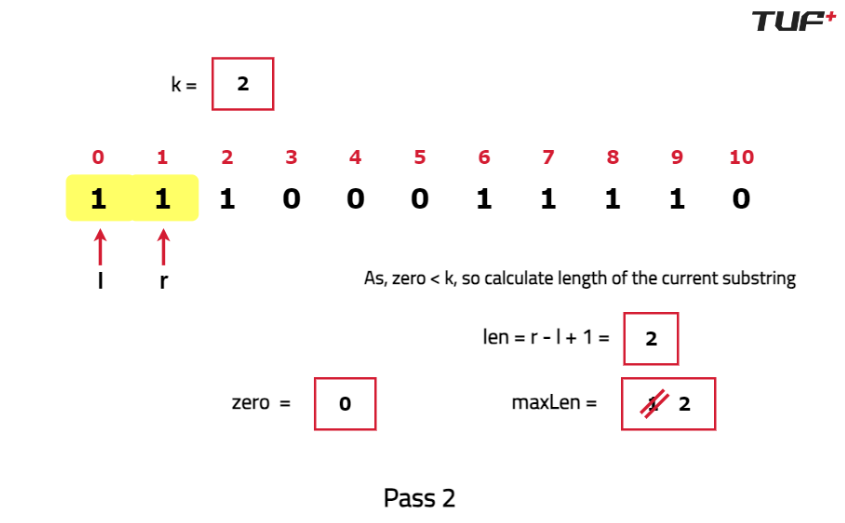
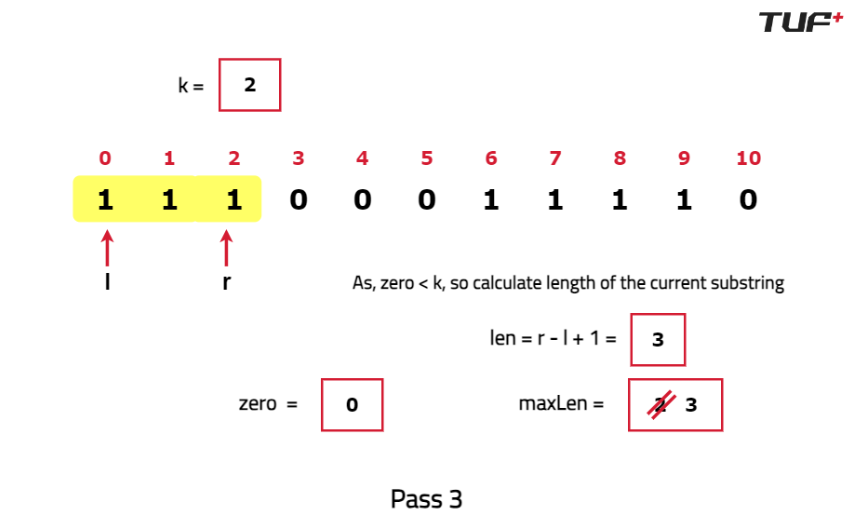
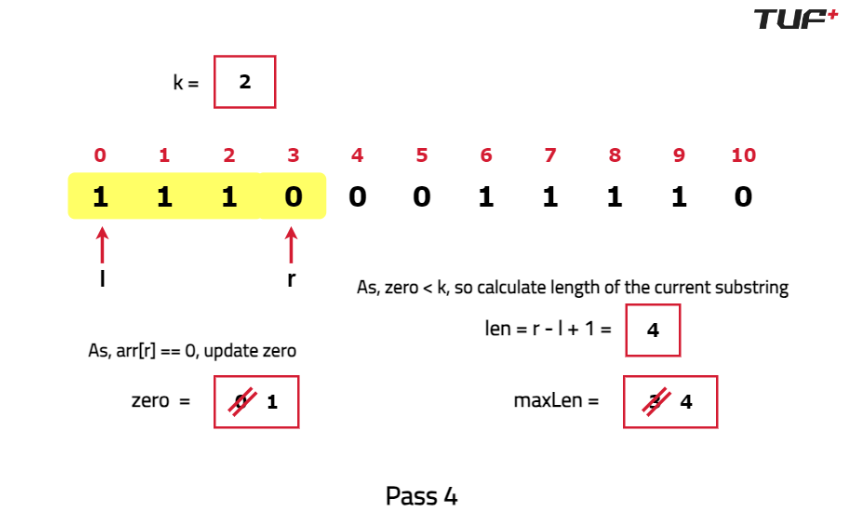

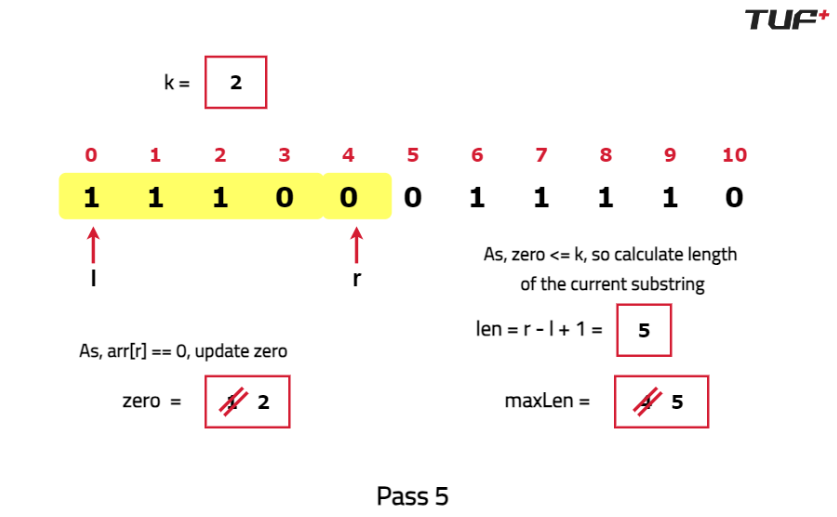
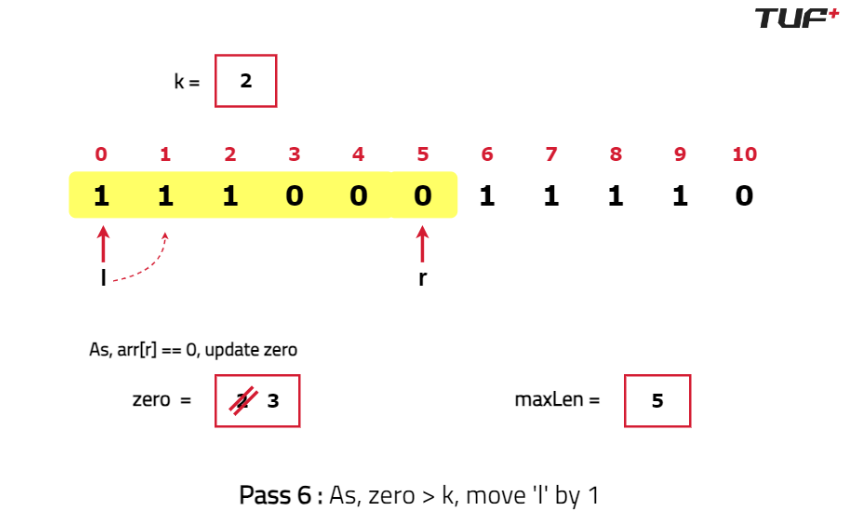
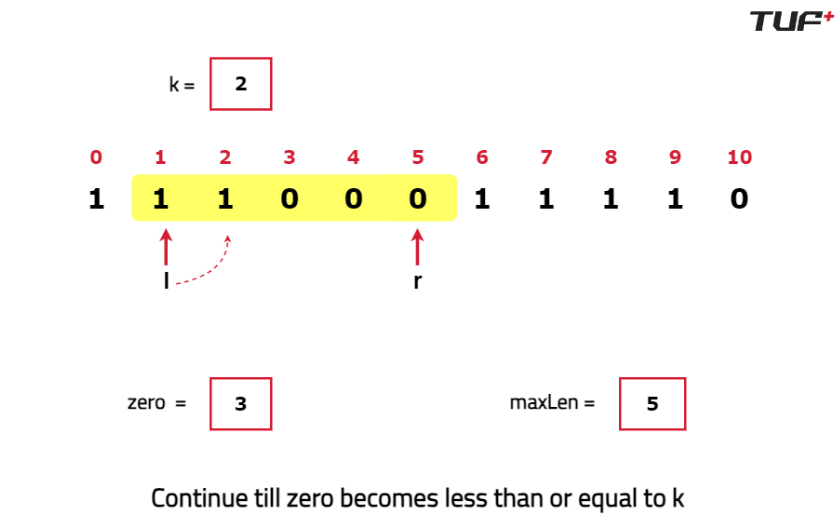
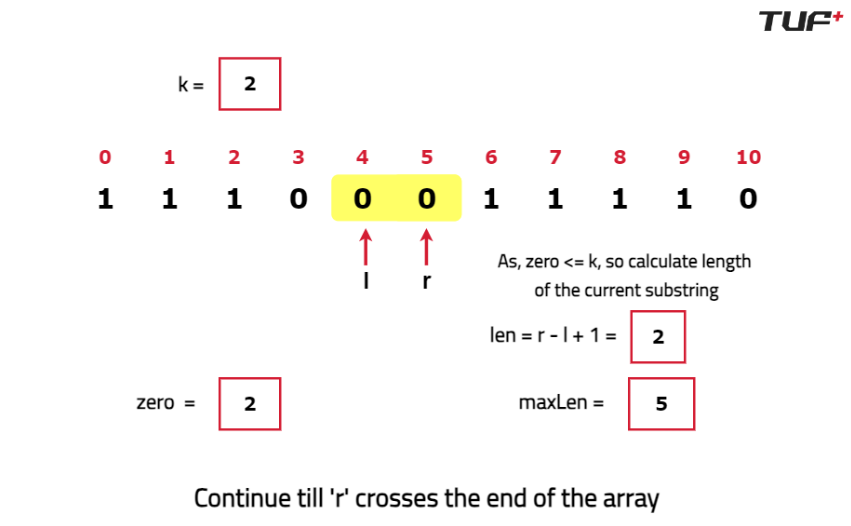
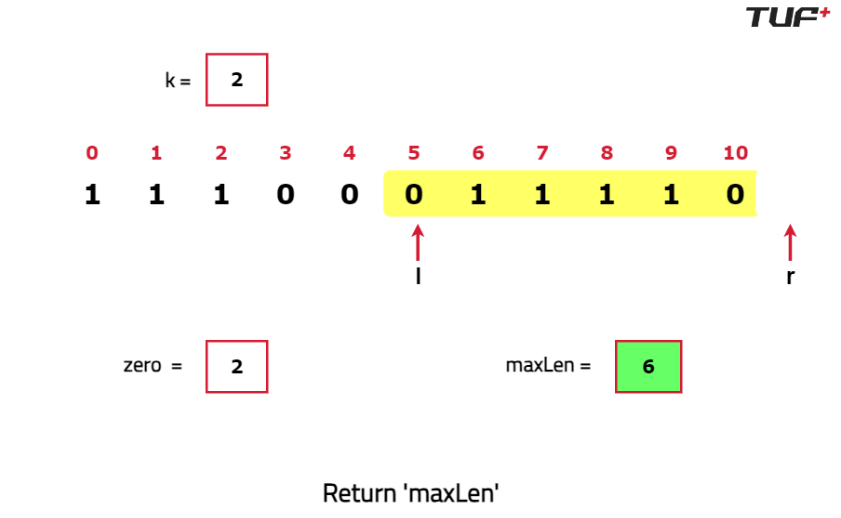

## Optimal Python Solution

In [11]:
class Solution:
    """ Function to find the length of the
    longest substring with at most k zeros """
    def longestOnes(self, nums, k):
        
        # Length of the input array
        n = len(nums)
        
        # Pointers for sliding window approach
        l, r = 0, 0
        
        """ Variables to count zeros
        and store maximum length """
        zeros, maxLen = 0, 0
               
        """ Iterate through the array 
        using sliding window approach """
        while r < n:
            
            if nums[r] == 0:
                zeros += 1
            
            if zeros > k:
                if nums[l] == 0:
                    
                    """ Decrement zeros count
                    when moving left pointer """
                    zeros -= 1 
                l += 1
            
            if zeros <= k:
                """ Calculate the length 
                of current substring """
                length = r - l + 1
            
                """ Update maxLen if the current
                substring length is greater """
                maxLen = max(maxLen, length)
            
            r += 1  
        
        # Return the maximum length
        return maxLen

In [12]:
if __name__ == "__main__":
    input_nums = [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]
    k = 2  
    
    # Create an instance of Solution class
    sol = Solution()
    
    length = sol.longestOnes(input_nums, k)
    
    # Print the result
    print(f"Length of longest substring with at most {k} zeros flipped: {length}")

Length of longest substring with at most 2 zeros flipped: 6


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), where N is the size of the array. This is because for every element, the loop only runs N times.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no extra space is being used.
```

## FAQs & Interview Follow-ups :

**What happens if nums contains no 0s?**
```
If the array contains no 0s, the entire array is already the longest subarray of consecutive 1s. The output will be n, where n is the length of the array.
```

**Can k be greater than the number of 0s in the array?**
```
Yes, in this case, all 0s can be flipped, and the result will be the length of the entire array, as all elements can become 1.
```

**How would you modify the solution to return the indices of the longest subarray?**
```
Track the start and end indices of the current window whenever a new Maximum Length is found. Return these indices along with the length.
```

**How would the problem change if flipping 1s into 0s were also allowed?**
```
Extend the logic to handle both flipping operations by maintaining separate counters for flipped 1s and 0s. Adjust the sliding window to ensure both constraints are satisfied.
```

# 3. Fruit into Baskets :

## Problem Statement :

There is only one row of fruit trees on the farm, oriented left to right. An integer array called fruits represents the trees, where fruits[i] denotes the kind of fruit produced by the ith tree.

The goal is to gather as much fruit as possible, adhering to the owner's stringent rules:

* There are 2 baskets available, and each basket can only contain 1 kind of fruit. The quantity of fruit each basket can contain is unlimited.
* Start at any tree, but as you proceed to the right, select exactly one fruit from each tree, including the starting tree. One of the baskets must hold the harvested fruits.
* Once reaching a tree with fruit that cannot fit into any basket, stop.

Return the Maximum Number of fruits that can be picked.

### Examples :

**Example 1:**
```
Input : fruits = [1, 2, 1]
Output : 3

Explanation :
We will start from the first tree.
The first tree produces the fruit of kind '1' and we will put that in the first basket.
The second tree produces the fruit of kind '2' and we will put that in the second basket.
The third tree produces the fruit of kind '1' and we have first basket that is already holding fruit of kind '1'. So we will put it in first basket.

Hence we were able to collect total of 3 fruits.
```

**Example 2:**
```
Input : fruits = [1, 2, 3, 2, 2]
Output : 4

Explanation :
We will start from the second tree.
The first basket contains fruits from second, fourth and fifth tree.
The second basket will contain fruit from the third tree.

Hence we collected a total of 4 fruits.
```

**Example 3:**
```
Input : fruits = [1, 2, 3, 4, 5]
Output: 2

```
```
Constraints:
1 <= fruits.length <= 10^5
0 <= fruits[i] < fruits.length
```

# Brute Force Solution

## Intuition

The idea here is to generate all possible substrings of the given array using 2 loops and while doing so, check if the number of different fruits is within the allowed limit in the current substring, using a set data structure. If the number of different fruits exceed limit, then no need to consider that substring, or else we calculate the length of the current substring and update the Maximum Length of the Substring.

## Approach

* Start by initializing variables n to store the length of the input array fruits, and maxLen to track the maximum length of substrings with at most 2 different types of fruits.
* Iterate the array for each index from 0 to sizeOfArray-1 to consider each index as the starting point of a substring.
* For each starting point, initialize an empty unordered_set named set to keep track of the types of fruits in the current substring and start another loop from starting point of the substring till sizeOfArray-1. Add each fruit to the set.
* After adding each fruit, check the size of the set. The set will only contain fruits that appear in the current substring.
* If the size of set is less than or equal to 2, it means the current substring has at most 2 different types of fruits. Calculate the length of this substring and update maxLen. Else, break out of the loop.
* After the outer and inner loops complete execution, return maxLen as an answer.

## Brute Force Python Solution

In [13]:
class Solution:
    """ Function to find the maximum
    fruits the basket can have """
    def totalFruits(self, fruits):
        
        # Length of the input array
        n = len(fruits)
        
        """ Variable to store the 
        maximum length of substring"""
        maxLen = 0
        
        """ Iterate through all possible 
        starting points of the substring"""
        for i in range(n):
            
            """ Use set to track
            different types of fruits"""
            s = set()
            
            for j in range(i, n):
                
                # Add fruit type to the set
                s.add(fruits[j])
                
                """ Check if the number of different
                fruits is within the allowed limit"""
                if len(s) <= 2:
                    
                    """ Calculate the length 
                    of current substring"""
                    length = j - i + 1
  
                    maxLen = max(maxLen, length)
                else:
                    break
        
        # Return the maximum length
        return maxLen

In [14]:
if __name__ == "__main__":
    input = [3, 3, 3, 1, 2, 1, 1, 2, 3, 3, 4]
    
    # Create an instance of Solution class
    sol = Solution()
    
    length = sol.totalFruits(input)
    
    # Print the result
    print("Maximum fruits in the basket is:", length)

Maximum fruits in the basket is: 5


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($N^2$), where N is the size of the array. This is because for every element of the array the inner loop runs for N times. Ignore the contribution of the Set data structure in the Time Complexity calculation as it takes O(log3), which can be considered as constant.

**Space Complexity:**

The Space Complexity will be O(3), as at most the Set data structure is holding 3 elements.

# Better Solution

## Intuition

The idea here is to use the Sliding Window approach with a HashMap data structure to keep track of the different types of the fruits found so far. Expand the window by moving the right pointer and if the the number of different types of fruits exceeds 2 then shrink the window until it becomes less than or equal to 2, thus eliminating fruits from the basket because of which the limit has exceed. This ensures to consider every possible case in an optimised way.

## Approach

* First, initialize few variables as: l, r as 0, maxLen variable to store the Maximum Length of Substrings with at most 2 different types of fruits, and mpp HashMap to track the count of each fruit type in the current sliding window defined by indices l (left) and r (right).
* Iterate through the array using the r pointer and add the current fruit to the HashMap mpp with its count incremented by one. Check if the number of different fruits exceeds 2. If it does, shrink the window from the left (l++) until the number of different fruits is at most 2. Else, Calculate the length of the current valid substring and update Maximum Length of Substring.
* Move the r pointer to the right (r++) to expand the window and repeat the process. Finally, return the Maximum Length of the Substring.

## Brute Force Python Solution

In [15]:
class Solution:
    """ Function to find the maximum
    fruits the basket can have """
    def totalFruits(self, fruits):
        
        # Length of the input array
        n = len(fruits)
        
        """ Variable to store the 
        maximum length of substring """
        maxLen = 0  
        
        """ Dictionary to track the count of each
        fruit type in the current window """
        mpp = {}
        
        # Pointers for the sliding window approach
        l, r = 0, 0
        
        while r < n:
            mpp[fruits[r]] = mpp.get(fruits[r], 0) + 1
            
            """ If number of different fruits exceeds
             2 shrink the window from the left """
            if len(mpp) > 2:
                while len(mpp) > 2:
                    mpp[fruits[l]] -= 1
                    if mpp[fruits[l]] == 0:
                        del mpp[fruits[l]]
                    l += 1
            
            """ If number of different fruits 
            is at most 2, update maxLen """
            if len(mpp) <= 2:
                maxLen = max(maxLen, r - l + 1)
            
            r += 1
        
        # Return the maximum fruit
        return maxLen

In [16]:
# Test the solution
if __name__ == "__main__":
    input = [3, 3, 3, 1, 2, 1, 1, 2, 3, 3, 4]
    
    # Create an instance of Solution class
    sol = Solution()
    
    length = sol.totalFruits(input)
    
    # Print the result
    print(f"Maximum fruits the basket can have: {length}")

Maximum fruits the basket can have: 5


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(2N), where N is the size of the array. This is because the other while loop runs for N time and the inner while loop runs for N time in total throghout the program. Ignore the contribution of Map Data Structure in the Time Complexity as size of the map is extremely small.
```

**Space Complexity:**
```
The Space Complexity will be O(3), as at most the Map Data Structure is holding 3 elements.
```

# Optimal Solution

## Intuition

The idea here is to employ the Sliding Window approach efficiently by avoiding the additional O(N) Time Complexity incurred when shifting the window entirely in the Better Solution, to ensure that the different types of fruits does not exceed 2. Instead of moving the left pointer (l) to eliminate the extra fruits completely, shift the window by one position at a time. This method ensures that the problem can be solved in O(N) Time Complexity only.

## Approach

* First, initialize few variables as: l and r pointers as 0 for the Sliding Window approach, maxLen variable to store the Maximum Length of Substrings with at most 2 different types of fruits, mpp as an unordered_map to track the count of each fruit type in the current Sliding Window.
* Iterate through the array using the r pointer and add the current fruit to the map with its count incremented by one.
* Check if the number of different fruits exceeds 2.If so, it means there are more than 2 different types of fruits in the current window. Therefore, shrink the window from the left (l++). Adjust the count in mpp accordingly. If the count of fruits[l] becomes 0, remove it from the map. Else, Calculate the Length of the Current Valid Substring.
* Update maxLen, move the r pointer to the right (r++) to expand the window and repeat the process. Finally, return the maxLen as an ans.

## Dry Run

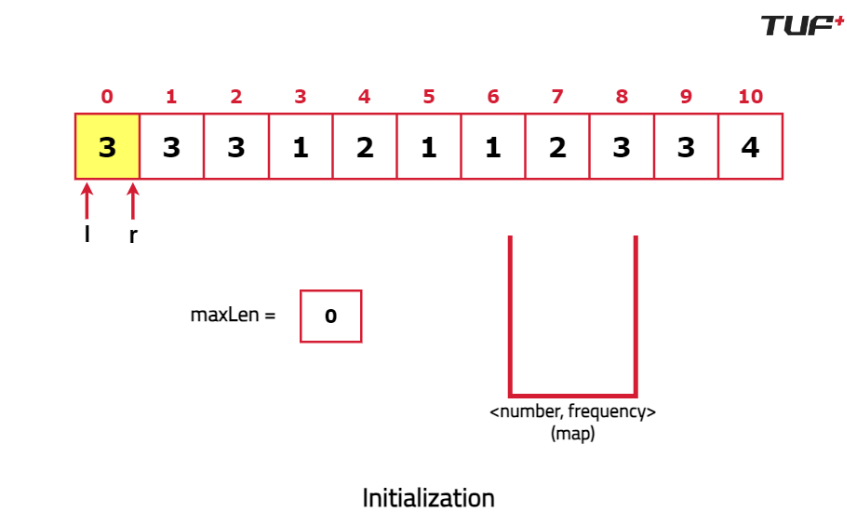
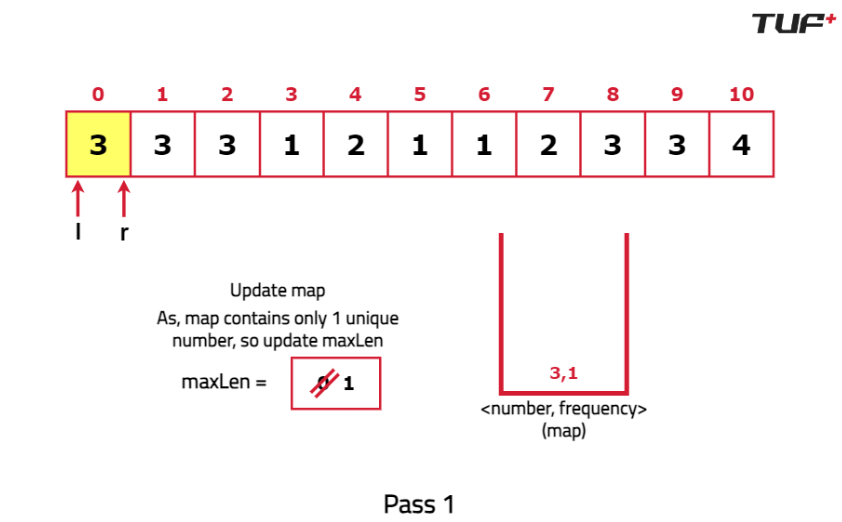
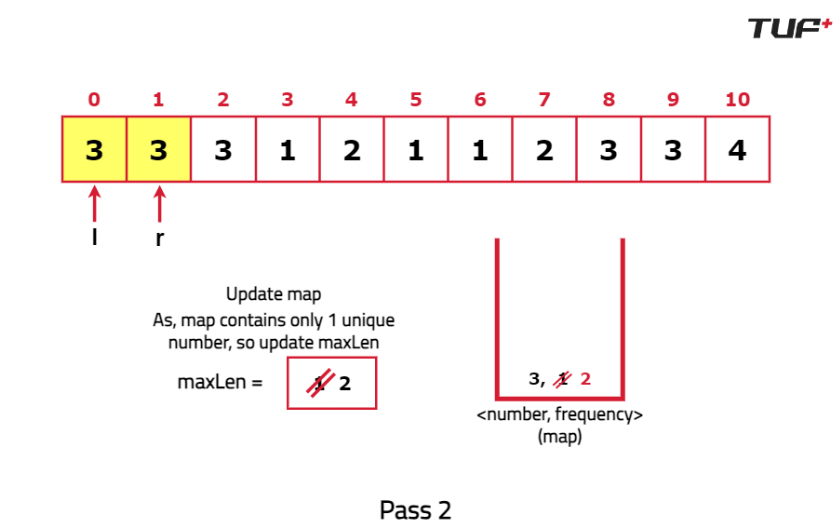
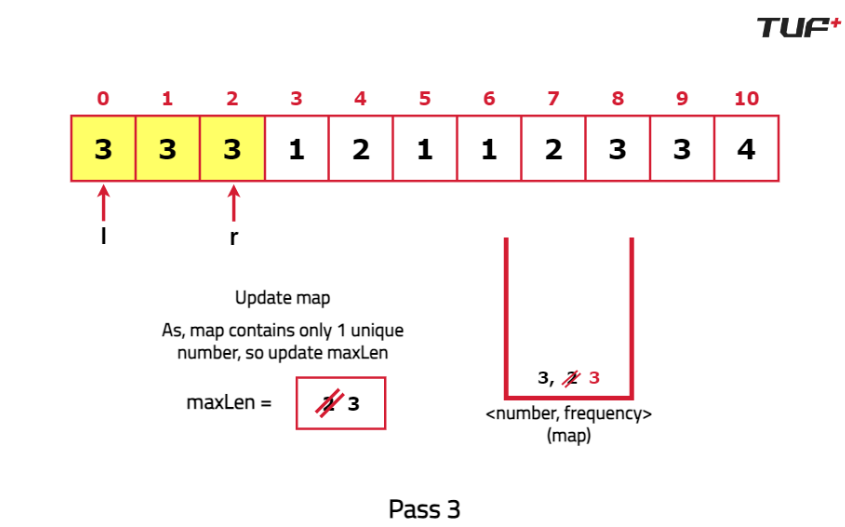
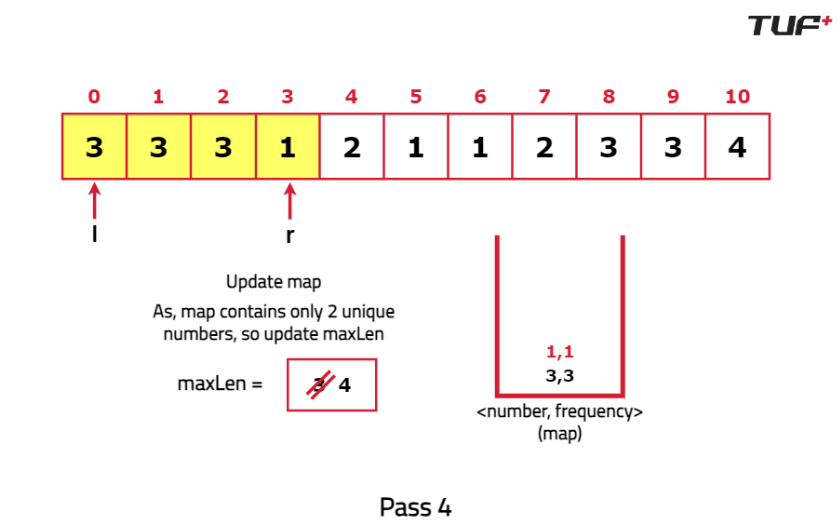

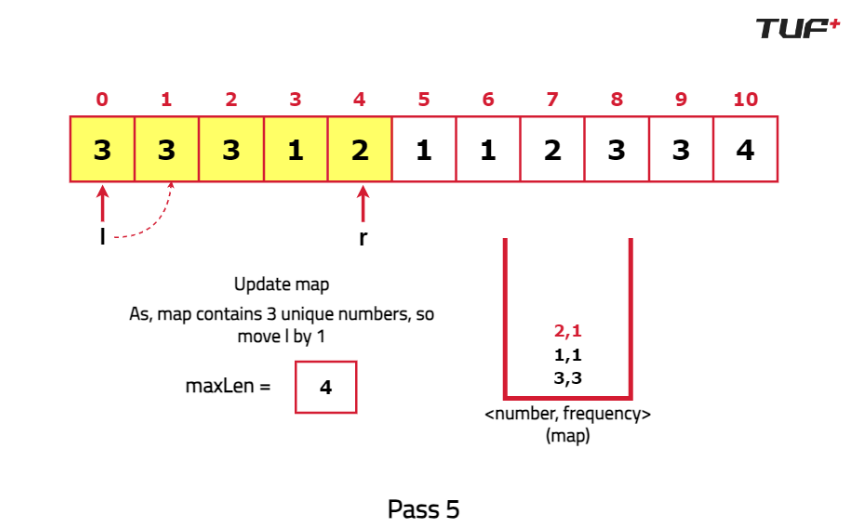
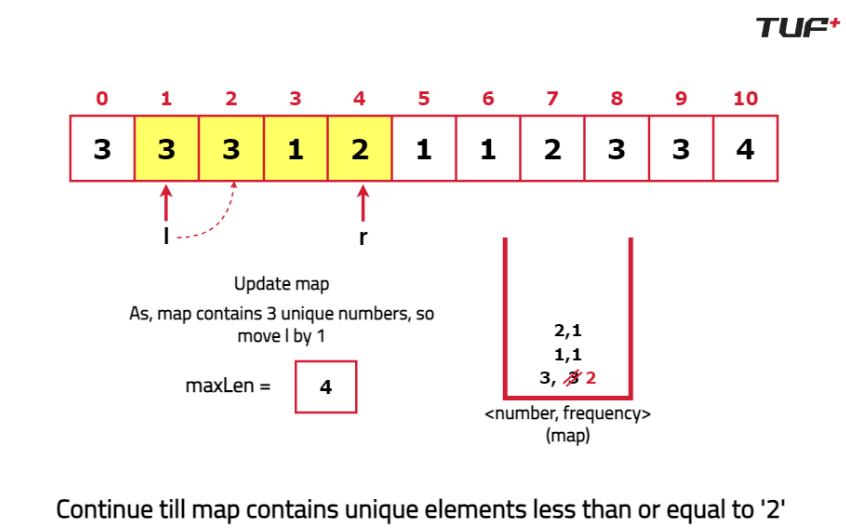
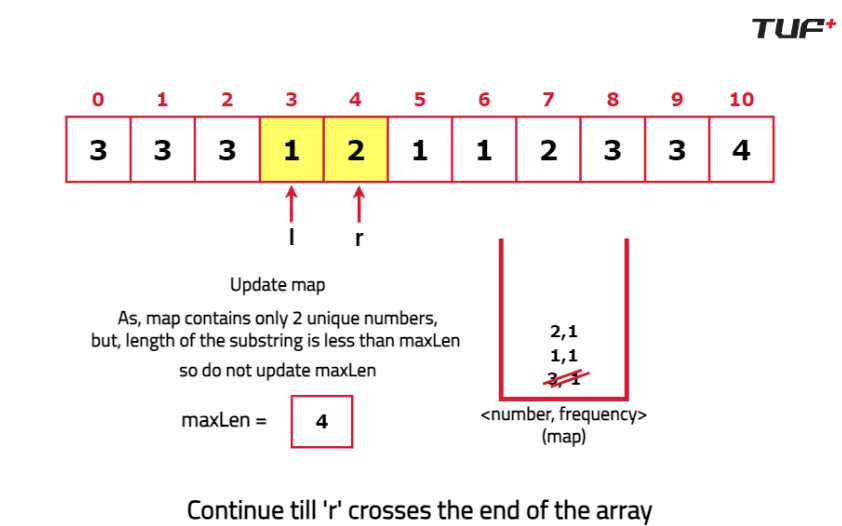
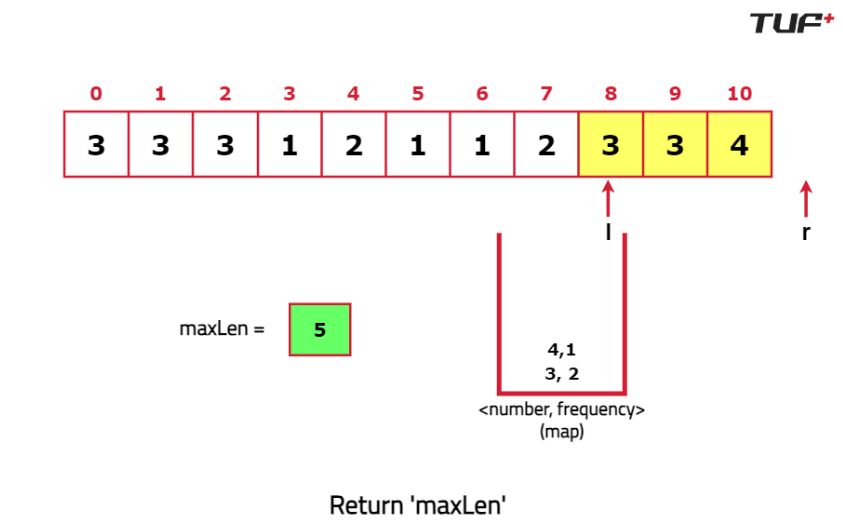

## Optimal Python Solution

In [17]:
class Solution:
    """ Function to find the maximum
    fruits the basket can have """
    def totalFruits(self, fruits):
        
        # Length of the input array
        n = len(fruits)
        
        """ Variable to store the 
        maximum length of substring """
        maxLen = 0  
        
        """ Dictionary to track the count of each
        fruit type in the current window """
        mpp = {}
        
        # Pointers for the sliding window approach
        l, r = 0, 0
        
        while r < n:
            mpp[fruits[r]] = mpp.get(fruits[r], 0) + 1
            
            """ If number of different fruits exceeds
             2 shrink the window from the left """
            if len(mpp) > 2:
                mpp[fruits[l]] -= 1
                if mpp[fruits[l]] == 0:
                    del mpp[fruits[l]]
                l += 1
            
            """ If number of different fruits 
            is at most 2, update maxLen """
            if len(mpp) <= 2:
                maxLen = max(maxLen, r - l + 1)
            
            r += 1
        
        # Return the maximum fruit
        return maxLen

In [18]:
if __name__ == "__main__":
    input = [3, 3, 3, 1, 2, 1, 1, 2, 3, 3, 4]
    
    # Create an instance of Solution class
    sol = Solution()
    
    len = sol.totalFruits(input)
    
    # Print the result
    print(f"Maximum fruits the basket can have: {len}")

Maximum fruits the basket can have: 5


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), where N is the size of the array. This is because the while loop runs for N time only. Ignore the contribution of map data structure in the Time Complexity as size of the map is extremely small.
```

**Space Complexity:**
```
The Space Complexity will be O(N), as the map may store up to N unique fruit types in the worst case.
```

## FAQs & Interview Follow-ups :

**What if there are fewer than three types of fruit?**
```
If the array contains fewer than three types, the entire array is valid, and the result is the length of the array.
```

**How is the Hash Map used to manage the Sliding Window?**
```
The Hash Map tracks the count of each fruit type in the current window. When a fruit type is removed (due to shrinking the window), its count is decremented, and it is removed from the Hash Map if the count reaches zero.
```

**How would you modify the solution if the number of baskets increased?**
```
Generalize the Sliding Window approach to handle k baskets by ensuring the Hash Map contains at most k fruit types at any time. The rest of the logic remains the same.
```

**What if you wanted to return the range of trees contributing to the maximum fruits?**
```
Along with tracking the maximum size, store the indices of the start and end of the window whenever the maximum is updated. Return these indices.
```

# 4. Longest Repeating Character Replacement :

## Problem Statement :

Given an integer k and a string s, any character in the string can be selected and changed to any other uppercase English character. This operation can be performed up to k times. After completing these steps, return the length of the longest substring that contains the same letter.


### Examples :

**Example 1:**
```
Input : s = "BAABAABBBAAA" , k = 2
Output : 6

Explanation :
We can change the B present at index 0 and 3 (0 based indexing) to A. The new string is "AAAAAABBBAAA".
The substring "AAAAAA" is the longest substring having same letter with length 6.
```

**Example 2:**
```
Input : s = "AABABBA" , k = 1
Output : 4

Explanation :
The underlined characters are changed in the new string obtained.
The new string is "AABBBBA". The substring "BBBB" is the answer.
There are other ways to achieve this answer as well.
```

**Example 3:**
```
Input : s = "AABABBA" , k = 1
Output : 4
```

```
Constraints:
1 <= s.length <= 10^5
0 <= k <= s.length
s contains only English uppercase letters.
```

# Brute Force Solution

## Intuition

The thought process is very straightforward - first find out each and every substring and while doing so, keep a track of characters and their frequencies. Further, calculate the number of characters that need to be changed, and if it is greater than the given limit then no need to consider that substring. Otherwise calculate the maximum length of the substring encountred so far.

## Approach

* First, initialize few variables: maxLen as 0 to track the Maximum Length found and maxFreq as 0 to track the highest frequency of any single character in the current window.
* Iterate through the array, which will basically be the starting point of the substring. For each starting index, initialize a frequency array hash to count occurrences of characters.
* Update max frequency encountered and store it in maxFreq variable. Calculate the number of changes needed to make.
* If the number of changes is less than or equal to k, update maxLen with the size of the current valid window. If the number of changes exceed k, break out of the inner loop since further expanding the window won't help in achieving a valid substring. Finally return the maxLen as a answer.

## Brute Force Python Solution

In [25]:
import builtins
len = builtins.len
range = builtins.range

class Solution:
    """
    Function to find the longest substring
    with at most k characters replaced.
    """
    def characterReplacement(self, s: str, k: int) -> int:

        n = len(s)
        """ Variable to store the maximum
        length of substring found"""
        maxLen = 0
        
        """ Variable to track the maximum frequency of
        any single character in the current window"""
        maxFreq = 0

        # Iterate through each starting point of the substring
        for i in range(n):
            
            # Initialize hash array for character frequencies
            hash = [0] * 26

            for j in range(i, n):
                
                """ Update frequency of current
                character in the hash array"""
                hash[ord(s[j]) - ord('A')] += 1

                # Update max frequency encountered
                maxFreq = max(maxFreq, hash[ord(s[j]) - ord('A')])

                # Calculate the number of changes needed to make
                changes = (j - i + 1) - maxFreq

                """ If the number of changes is less than or 
                equal to k, the current window is valid"""
                if changes <= k:
                    maxLen = max(maxLen, j - i + 1)
                else:
                    break

        """ Return the maximum length of substring
        with at most k characters replaced"""
        return maxLen

In [26]:
if __name__ == "__main__":
    s = "AABABBA"
    k = 2
    
    # Create an instance of Solution class
    sol = Solution()
    
    length = sol.characterReplacement(s, k)
    
    # Print the result
    print(f"Maximum length of substring with at most {k} characters replaced: {length}")

Maximum length of substring with at most 2 characters replaced: 5


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^2$), where N is the size of the array. This is because we are iterating the array twice using two for loops.

**Space Complexity:**

The Space Complexity will be O(26) since we are using a Hash array to store the frequencies of the capital letters.

# Better Solution

## Intuition

The idea here is to use the Sliding Window technique to solve this problem optimally. This method efficiently finds the Longest Substring with Frequency Counting and Dynamic Adjustments to ensure validity of the window. First expand the window and add those substrings that validate the condition and when it crosses the limit, again shrink the window by moving the left pointer. This process ensures to provide a Linear Time Complexity.

## Approach

* First initialize few variables: l (left) and r (right) as 0 to define the current window in the string, maxLen as 0 to track the Maximum Length of valid substrings, and maxFreq as 0 to Monitor the Highest Frequency of any Single Character within the current window. Also, maintain a frequency array hash to count occurrences of characters.
* Incrementally expand the window by moving the r pointer to the right. Update the Frequency of the Current Character in Hash and adjust maxFreq if this frequency exceeds the current maxFreq.
* Check if the number of characters that need replacement exceeds k. If so, slide the l pointer to the right until the window becomes valid again. Adjust the frequencies in hash and update maxFreq accordingly.
* After ensuring the window is valid, update maxLen with the length of the current window. Finally, return maxLen, which holds the length of the longest substring.

## Better Python Solution

In [27]:
class Solution:
    """
    Function to find the longest substring 
    with at most k characters replaced
    """
    def characterReplacement(self, s: str, k: int) -> int:
        
        """ Variable to store the maximum
        length of substring found"""
        maxLen = 0
        
        """ Variable to track the maximum frequency
        of any single character in the current window"""
        maxFreq = 0
        
        # Pointers to maintain the current window [l, r]
        l = 0
        r = 0
        
        # Hash array to count frequencies of characters
        hash = [0] * 26

        # Iterate through each starting point of substring
        while r < len(s):
            
            """ Update frequency of current
            character in the hash array"""
            hash[ord(s[r]) - ord('A')] += 1
            
            # Update max frequency encountered
            maxFreq = max(maxFreq, hash[ord(s[r]) - ord('A')])
            
            # Check if current window is invalid
            while (r - l + 1) - maxFreq > k:
                
                """ Slide the left pointer to
                make the window valid again"""
                hash[ord(s[l]) - ord('A')] -= 1
                
                # Recalculate maxFreq for current window
                maxFreq = 0
                for i in range(26):
                    maxFreq = max(maxFreq, hash[i])
                
                # Move left pointer forward
                l += 1
            
            """ Update maxLen with the length
            of the current valid substring"""
            maxLen = max(maxLen, r - l + 1)
            
            # Move right pointer forward to expand window
            r += 1

        """ Return the maximum length of substring
        with at most k characters replaced"""
        return maxLen

In [28]:
if __name__ == "__main__":
    s = "AABABBA"
    k = 2

    # Create an instance of Solution class
    sol = Solution()

    length = sol.characterReplacement(s, k)

    # Print the result
    print(f"Maximum length of substring with at most {k} characters replaced: {length}")

Maximum length of substring with at most 2 characters replaced: 5


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O((N+N) * 26), where N is the size of the array. The right pointer runs for N times and the left pointer runs for N times throughout. The for loop takes extra O(26) to claculate the maximum frequency.
```

**Space Complexity:**
```
The Space Complexity will be O(26) as we are using a Hash array to store all the characters.
```

# Optimal Solution

## Intuition

The idea here is to use the Sliding Window approach by avoiding the additional O(N) Time Complexity incurred when shifting the window entirely in the Better solution, to ensure that no more than k characters gets replaced in the current substring. Instead of moving the left pointer (l) completely till the distinct character comes under given limit, shift the window by one position at a time. This way the extra while loop used in the Better approach can be eliminated.

## Approach

* First, initialize few variables: l (left) and r (right) as 0 to define the current window in the string, maxLen as 0 to track the maximum length of valid substrings. Also, maintain a Frequency Array Hash to count occurrences of characters.
* Incrementally expand the window by moving the r pointer to the right. Update the frequency count of current character. Track the Maximum Frequency encountered (maxFreq) within the current window.
* If the length of the current window minus maxFreq exceeds k, the window becomes invalid. Slide the l pointer to the right to shrink the window by one position by decrementing the frequency count of character at the left pointer.
* After ensuring the window is valid, update maxLen with the length of the current window. Continue this process until the r pointer reaches the end of the string and finally, return maxLen as an answer.

## Dry Run

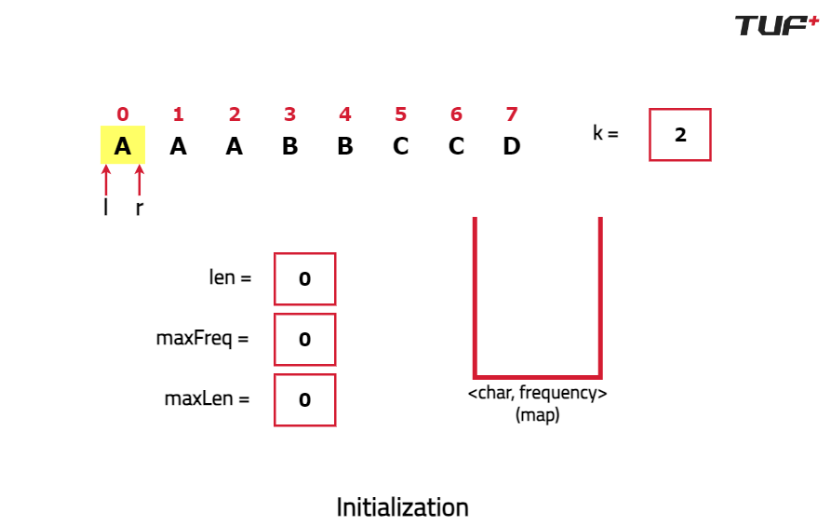
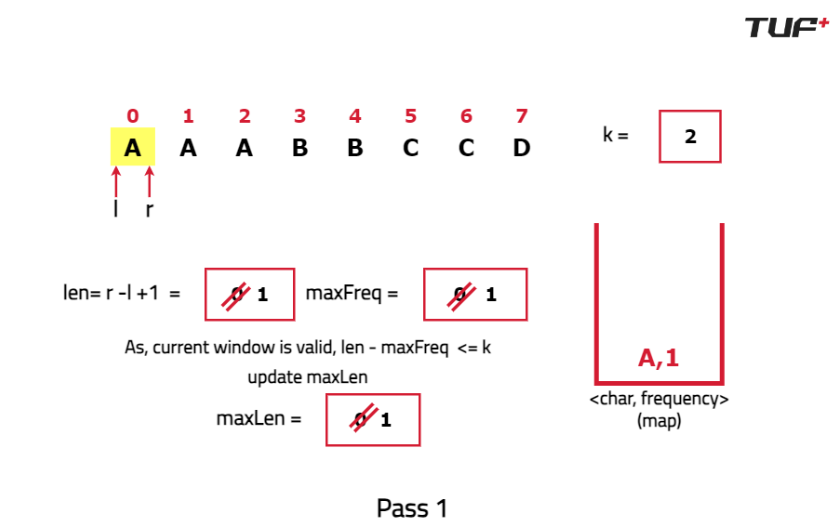
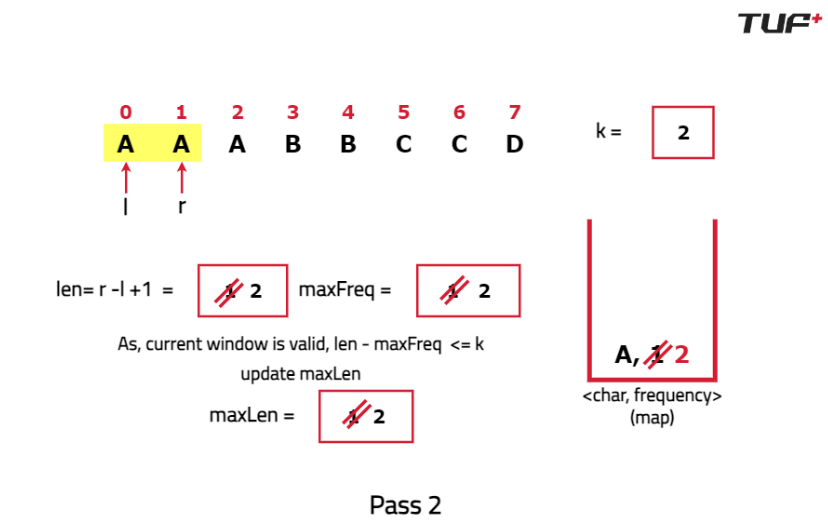
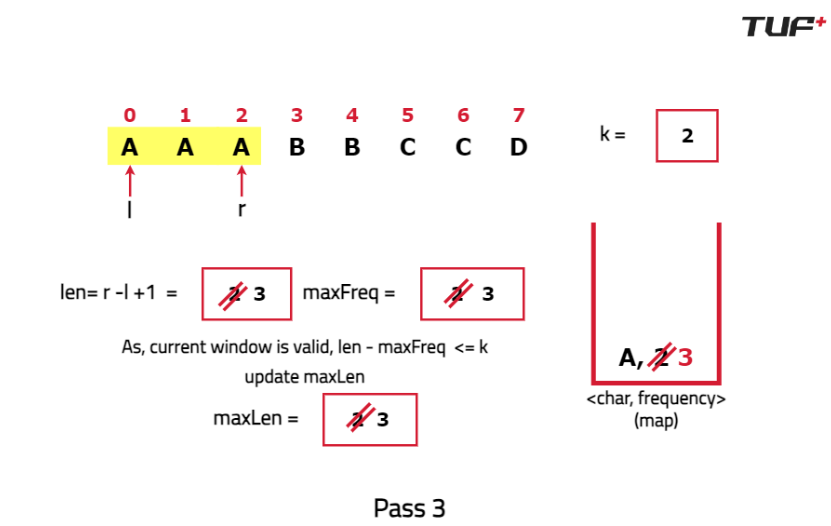
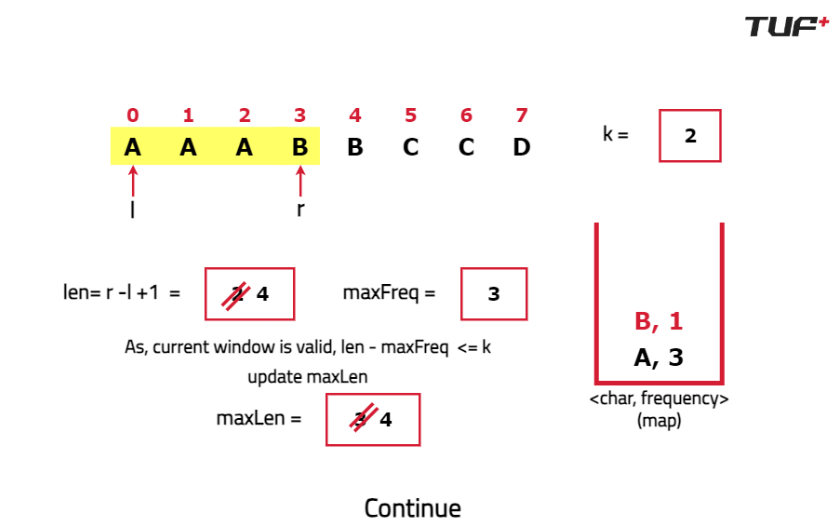

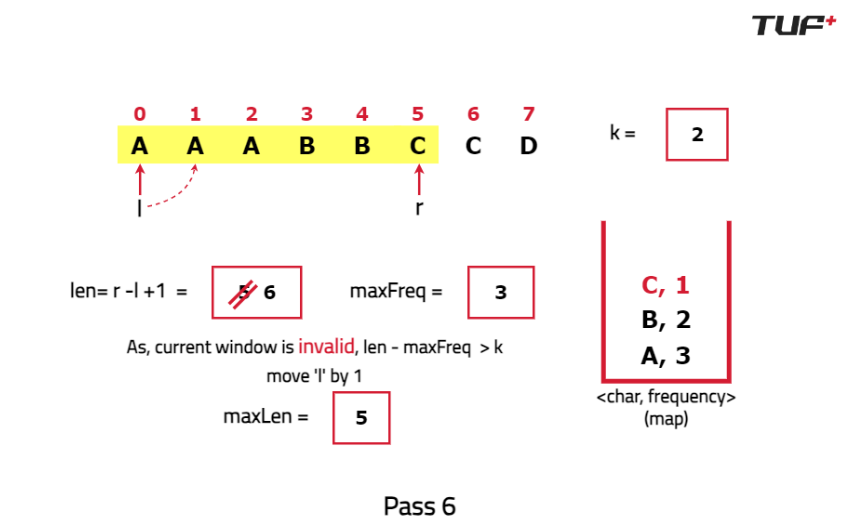
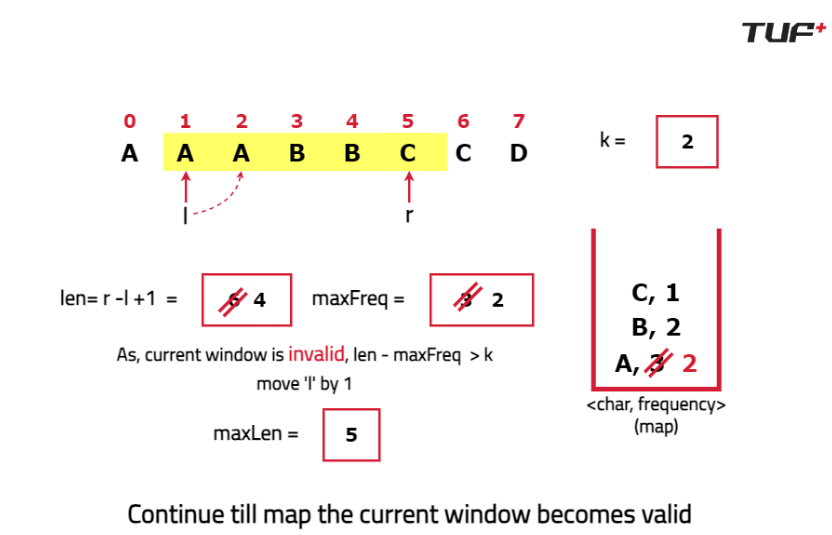
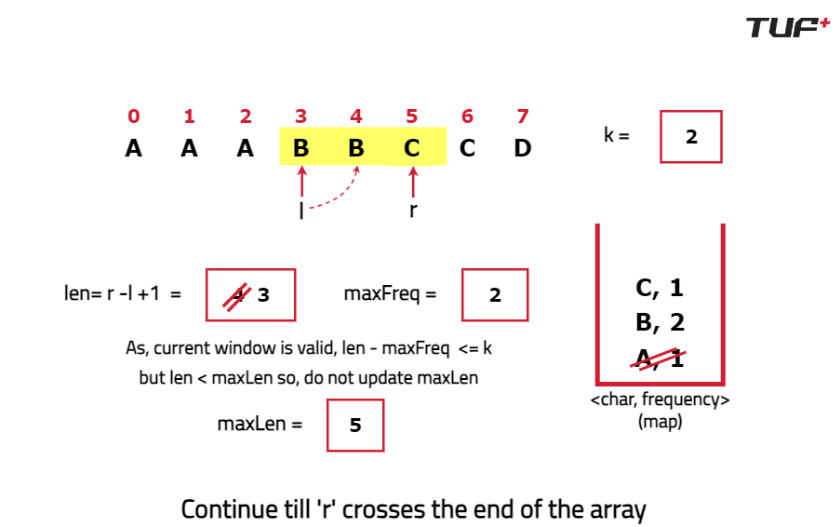

## Optimal Python Solution

In [ ]:
class Solution:
    """
    Function to find the longest substring 
    with at most k characters replaced
    """
    def characterReplacement(self, s: str, k: int) -> int:
        
        """ Variable to store the maximum
        length of substring found"""
        maxLen = 0
        
        """ Variable to track the maximum frequency
        of any single character in the current window"""
        maxFreq = 0
        
        # Pointers to maintain the current window [l, r]
        l = 0
        r = 0
        
        # Hash array to count frequencies of characters
        hash = [0] * 26

        # Iterate through each starting point of substring
        while r < len(s):
            
            """ Update frequency of current
            character in the hash array"""
            hash[ord(s[r]) - ord('A')] += 1
            
            # Update max frequency encountered
            maxFreq = max(maxFreq, hash[ord(s[r]) - ord('A')])
            
            # Check if current window is invalid
            if (r - l + 1) - maxFreq > k:
                
                """ Slide the left pointer to
                make the window valid again"""
                hash[ord(s[l]) - ord('A')] -= 1
                
                # Move left pointer forward
                l += 1
            
            """ Update maxLen with the length
            of the current valid substring"""
            maxLen = max(maxLen, r - l + 1)
            
            # Move right pointer forward to expand window
            r += 1

        """ Return the maximum length of substring
        with at most k characters replaced"""
        return maxLen

In [ ]:
if __name__ == "__main__":
    s = "AABABBA"
    k = 2

    # Create an instance of Solution class
    sol = Solution()

    length = sol.characterReplacement(s, k)

    # Print the result
    print(f"Maximum length of substring with at most {k} characters replaced: {length}")

## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), where N is the size of the array. The right pointer runs for N times.
```

**Space Complexity:**
```
The Space Complexity will be O(26) since we are using a Hash array to store all the characters.
```

## FAQs & Interview Follow-ups :

**How is the replacement count calculated?**
```
The replacement count for a window is the total number of characters in the window minus the frequency of the most common character. This represents the number of characters that need to be changed.
```

**What happens if all characters in the string are the same?**
```
If all characters are identical, the entire string is valid without any replacements. The output is the length of the string.
```

**How would you handle lowercase letters or a mix of uppercase and lowercase?**
```
Adjust the frequency map to account for 52 characters (26 lowercase + 26 uppercase), or normalize the case before processing.
```

**What if you wanted to return the actual substring instead of its length?**
```
Track the start and end indices of the window whenever a new maximum length is found. Use these indices to extract the substring after completing the algorithm.
```

# 5. Binary Subarray with Sum :

## Problem Statement :

<b> Given a Binary array nums and an integer goal. Return the Number of Non-empty Subarrays with a Sum Goal. </b>

A subarray is a continuous part of the array.


### Examples :

**Example 1:**
```
Input : nums = [1, 1, 0, 1, 0, 0, 1] , goal = 3
Output : 4

Explanation : The subarrays with sum 3 are :
[1, 1, 0, 1]
[1, 1, 0, 1, 0]
[1, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1].
```

**Example 2:**
```
Input : nums = [0, 0, 0, 0, 1] , goal = 0
Output : 10

Explanation : Some of the subarrays with sum 0 are :
[0]
[0, 0]
[0, 0, 0]
[0, 0, 0, 0]
```

```
Constraints:
1 <= nums.length <= 3*10^4
0 <= goal <= nums.length
nums consist of only 0 and 1.
```

# Optimal Solution

## Intuition

Here, the idea is to use 2-pointers approach to optimize the solution. <b>So, basically instead of finding the Count of Substrings which have sum exactly equal to goal, try to find out count of subarrays whose sum is less than or equal to goal and the count of subarrays whose sum is less than or equal to goal-1.</b> The difference of both the counts will provide the required result in Linear Time.

## Approach

### Main Function:

* It calls the helper function to find out the number of subarrays with sum less than or equal to goal.
* In the second call, it gets the number of subarrays with sum less than or equal to goal - 1. Finally, the difference gives the exact count of subarrays with sum equal to goal.

### Helper Function:

* First, check for the edge case - if goal is negative, immediately return 0 because no valid subarray can have a negative sum.
* Now, initialize few variables: l (left) and r (right) to mark the current window of subarrays within nums, sum to zero to track the current sum of elements in the window, count to zero to accumulate the number of valid subarrays.
* Iterate through the array using the right pointer r. Add the element at right pointer to sum to include the current element in the window. While the sum is greater than goal decrease the sum and move the left pointer forward to shrink the window.
* Then, Count all subarrays ending at r pointer that satisfy the sum condition. Move the right pointer forward and iterate the whole array. Finally, return count as an answer.

## Dry Run

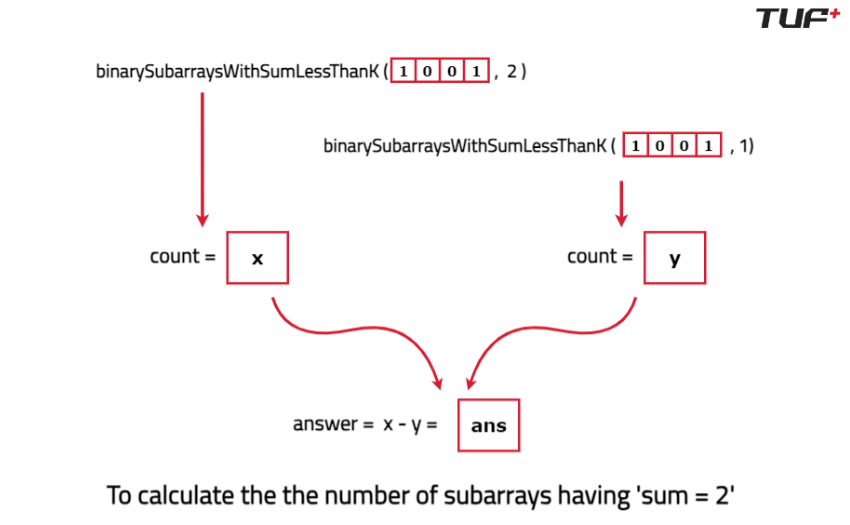

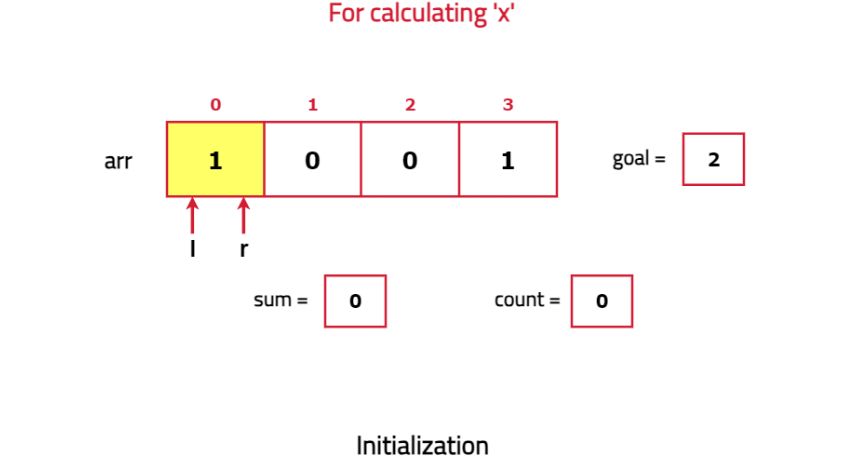
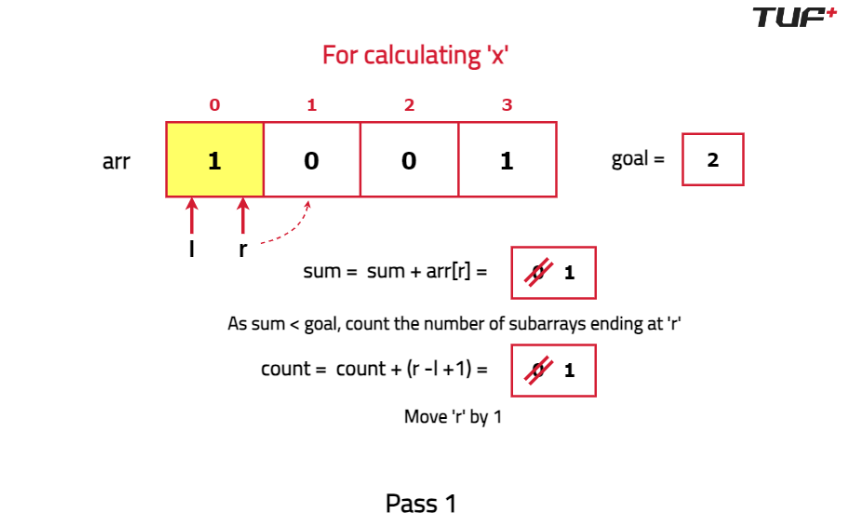
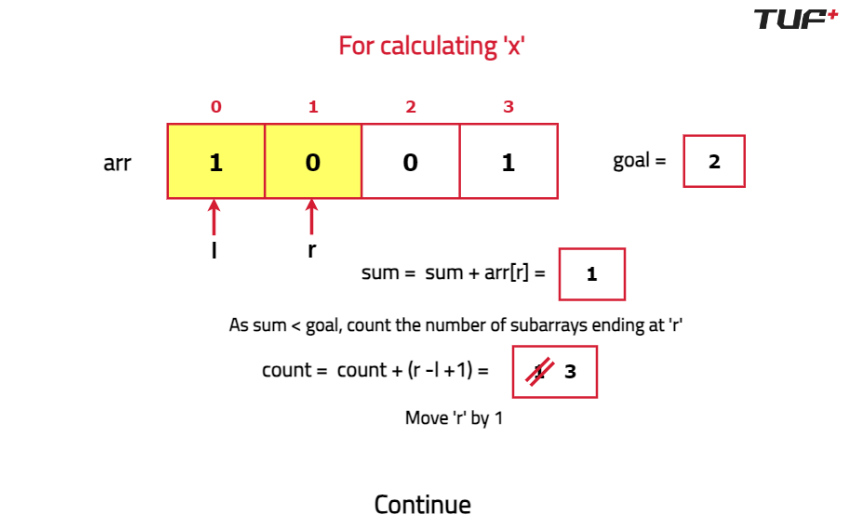
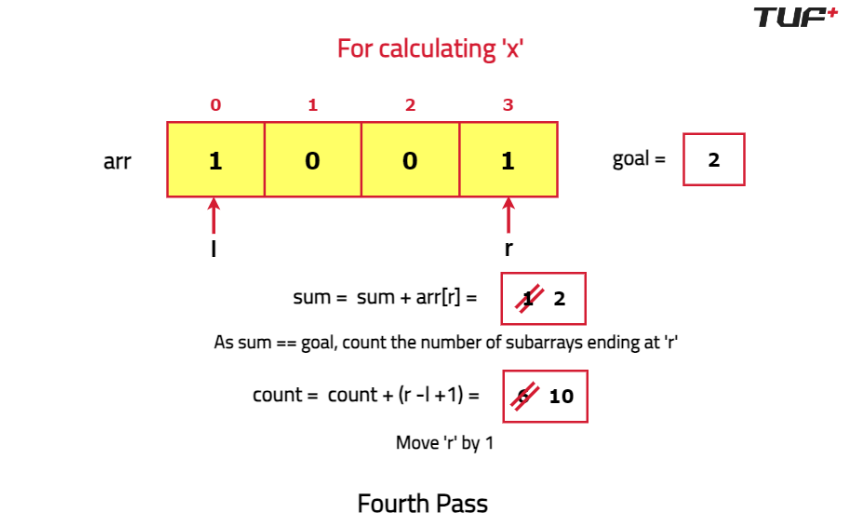
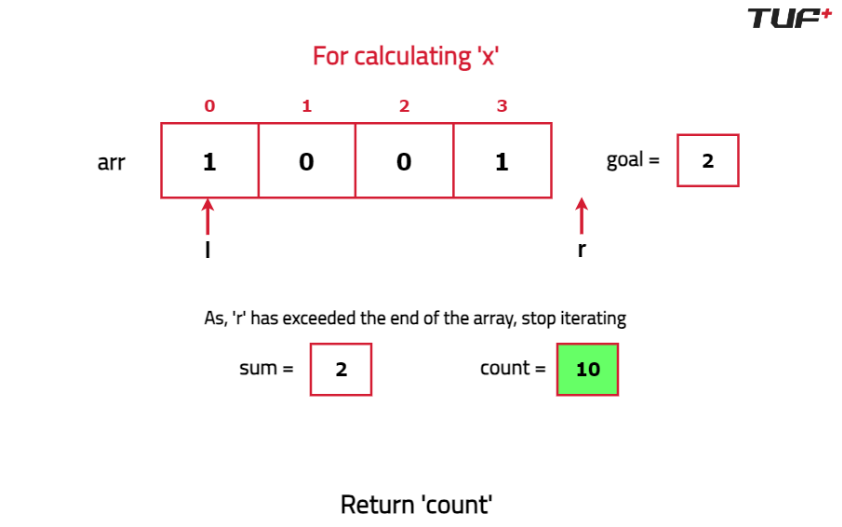

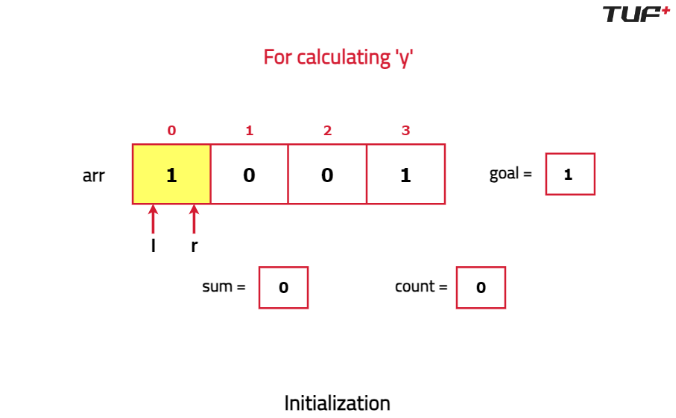
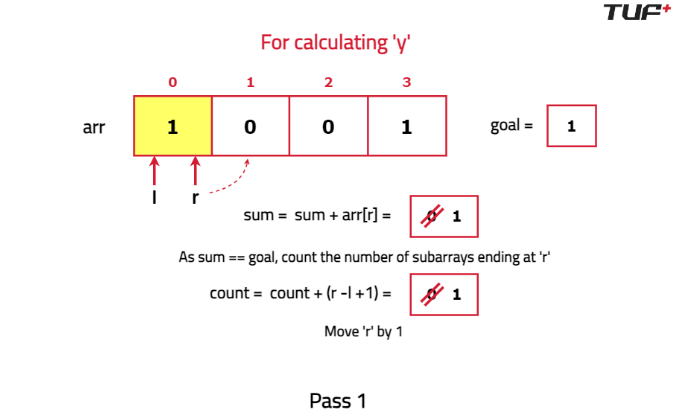
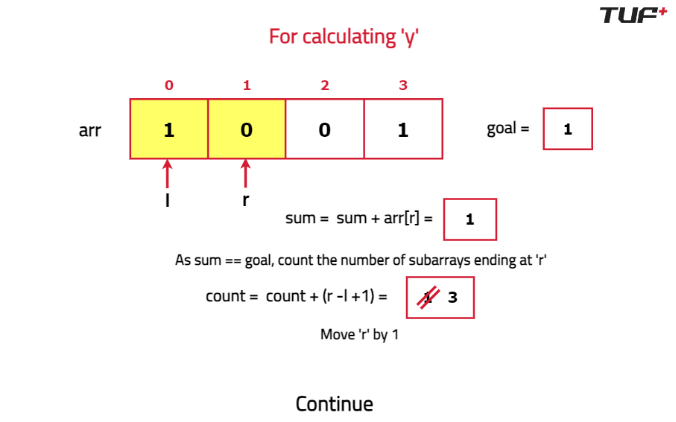
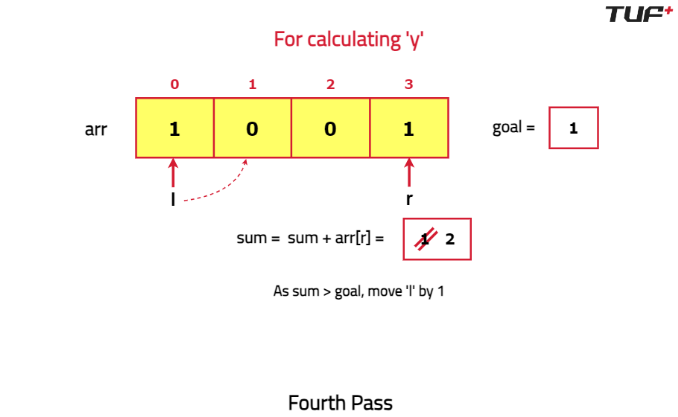
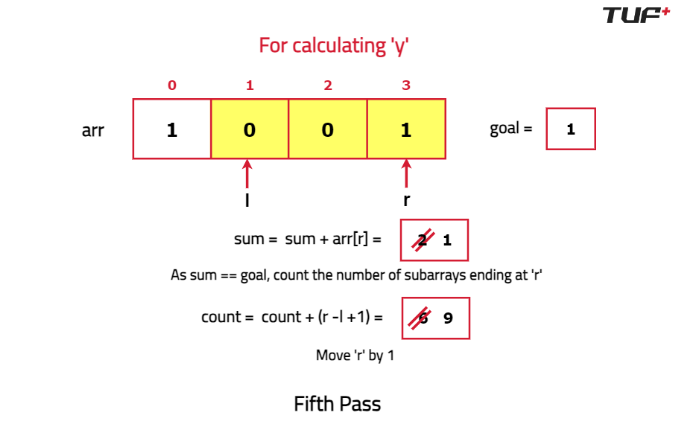
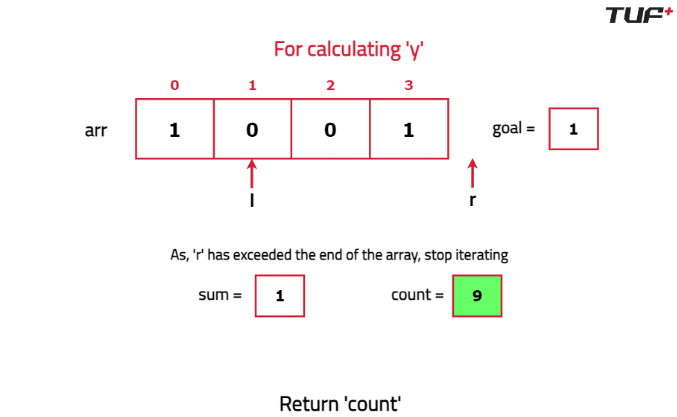

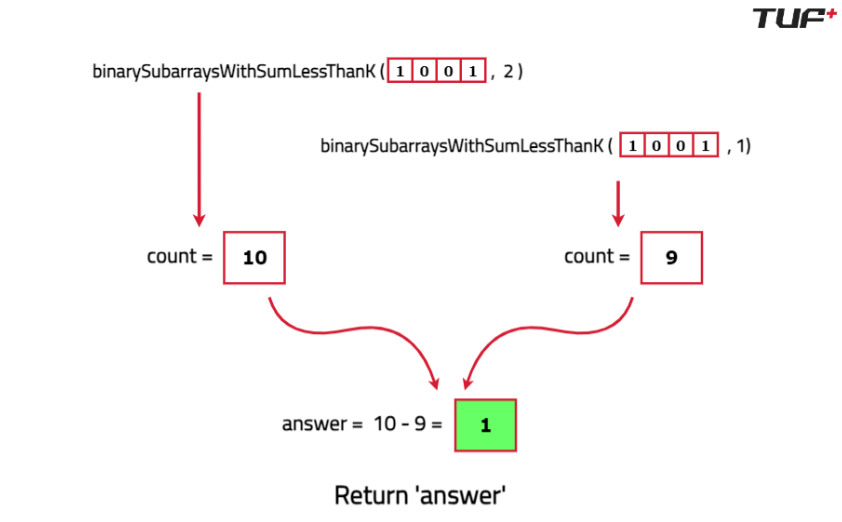

## Optimal Python Solution

In [29]:
from typing import List

class Solution:
    """ Function to find the number of 
    subarrays with sum equal to `goal` """
    def numSubarraysWithSum(self, nums: List[int], goal: int) -> int:
        """ Calculate the number of subarrays with 
        sum exactly equal to `goal` by using the 
        difference between subarrays with sum less
        than or equal to `goal` and those with sum
        less than or equal to `goal-1` """
        return self.numSubarraysWithSumLessEqualToGoal(nums, goal) - self.numSubarraysWithSumLessEqualToGoal(nums, goal - 1)
    
    """ Helper function to find the number of 
    subarrays with sum less than or equal to `goal` """
    def numSubarraysWithSumLessEqualToGoal(self, nums: List[int], goal: int) -> int:
        """ If goal is negative, there 
        can't be any valid subarray sum """
        if goal < 0:
            return 0
        
        # Pointers to maintain the current window
        l, r = 0, 0 
        
        """ Variable to track the current
        sum of elements in the window"""
        sum_val = 0     
        
        # Variable to count the number of subarrays
        count = 0   
        
        # Iterate through the array 
        while r < len(nums):
            sum_val += nums[r]
            
            """ Shrink the window from the left
            side if the sum exceeds `goal` """
            while sum_val > goal:
                sum_val -= nums[l]
                
                # Move the left pointer `l` forward
                l += 1
            
            """ Count all subarrays ending at
            `r` that satisfy the sum condition """
            count += (r - l + 1)
            
            # Move the right pointer `r` forward 
            r += 1 
        
        # Return the total count of subarrays
        return count

In [30]:
# Example usage:
if __name__ == "__main__":
    nums = [1, 0, 0, 1, 1, 0]
    goal = 2
    
    # Create an instance of Solution class
    sol = Solution()
    
    ans = sol.numSubarraysWithSum(nums, goal)
    
    # Print the result
    print(f"Number of substrings with sum \"{goal}\" is: {ans}")

Number of substrings with sum "2" is: 7


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(2*2N), where N is the size of the array. The outer loop runs for N times and the inner while loop might be running for N time throughout the program. So the total becomes O(2N). Also since the helper function is being called twice therefore the overall time complexity becomes O(2*2N).
```

**Space Complexity:**
```
The Space Complexity will be O(1) as there is no extra space being used.
```

## FAQs & Interview Follow-ups :

**HoWhy is Sliding Window applicable to this problem with a fixed sum goal?**
```
For Binary Arrays, the elements are only 0s and 1s, which means the Subarray Sum increases in a controlled way. This allows us to use the Sliding Window technique effectively to count subarrays with sum at most goal.
```

**What if all the elements are zero and the goal is zero?**
```
Subarrays consisting entirely of zeros can satisfy the condition. Use the prefix sum logic to count the number of such subarrays efficiently.
```

**What if the problem asked for the count of subarrays where the sum is less than the goal?**
```
Modify the algorithm to use cumulative counts and ranges to count subarrays where the sum is less than the goal, potentially requiring a nested loop or Fenwick tree.
```

**How would you handle the case of multiple goals (e.g., a list of goals)?**
```
Extend the Hash Map to track counts for multiple goals simultaneously or process each goal separately, depending on constraints.
```

# 6. Count Number of Nice Subarrays :

## Problem Statement :

Given an array nums and an integer k. <b> An array is called nice if and only if it contains k odd numbers. Find the number of nice subarrays in the given array nums.</b>

A subarray is continuous part of the array.


### Examples :

**Example 1:**
```
Input : nums = [1, 1, 2, 1, 1] , k = 3
Output : 2

Explanation : The subarrays with three odd numbers are
[1, 1, 2, 1]
[1, 2, 1, 1]
```

**Example 2:**
```
Input : nums = [4, 8, 2] , k = 1
Output : 0

Explanation : The array does not contain any odd number.
```

```
Constraints:
1 <= nums.length <= 5*10^4
1 <= nums[i] <= 10^5
1 <= k <= nums.length
```

# Optimal Solution

## Intuition

Here, the idea is to use 2-pointers approach to optimize the solution. <b> Since this problem is a slight variation of the problem of finding count of subarrays with given sum in binary array, the thought process would be very similar. Take the modulo 2 of the elements and if the element is even it will become 0, and it will become 1 otherwise. Thus the array would be converted into a binary subarray.</b> So, basically instead of finding the count of subarrays which have exactly k odd elements, try to find out count of subarrays where the number of odd elements is less than or equal to k and the count of subarrays with odd elements less than or equal to k-1. The difference of both the counts will provide the required result in linear time.

## Approach

### Main Function:

* It calls the helper function to find out number of subarrays with odd numbers less than or equal to k.
* In the second call, it gets the number of subarrays with odd numbers less than or equal to k - 1. Finally, the difference gives the exact count of subarrays with k odd elements.

### Helper Function:

* First, check for the edge case - if goal is negative, immediately return 0 because no valid subarray can have a negative sum.
* Now, initialize few variables: l (left) and r (right) to mark the current window of subarrays within nums, sum to zero to track the current sum of elements in the window, count to zero to accumulate the number of valid subarrays.
* Iterate through the array using the right pointer r. Add the element at right pointer to sum to include the current element in the window. While the sum is greater than k decrease the sum and move the left pointer forward to shrink the window.
* Then, Count all subarrays ending at r pointer that satisfy the sum condition. Move the right pointer forward and iterate the whole array. Finally, return count as an answer.

## Dry Run

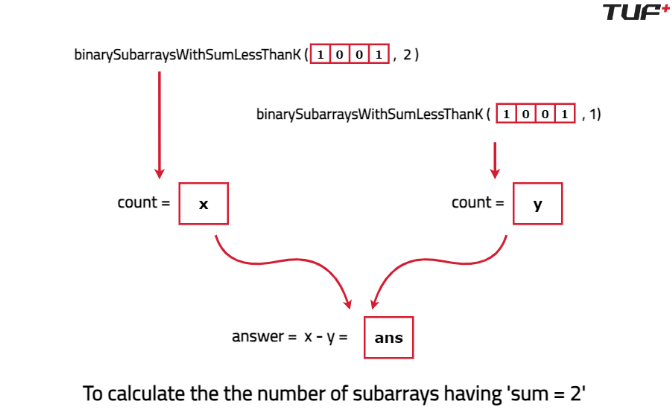
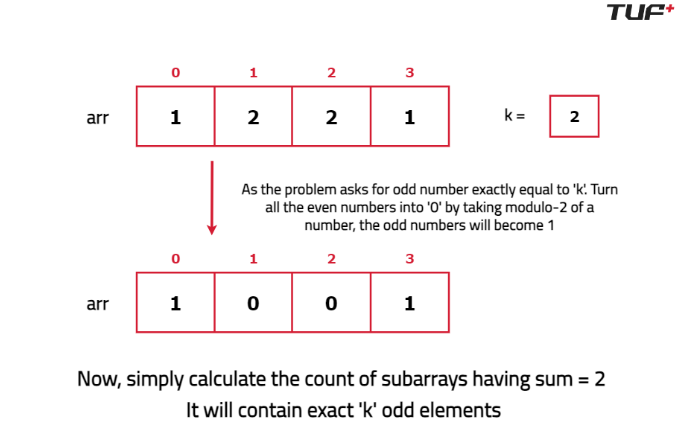

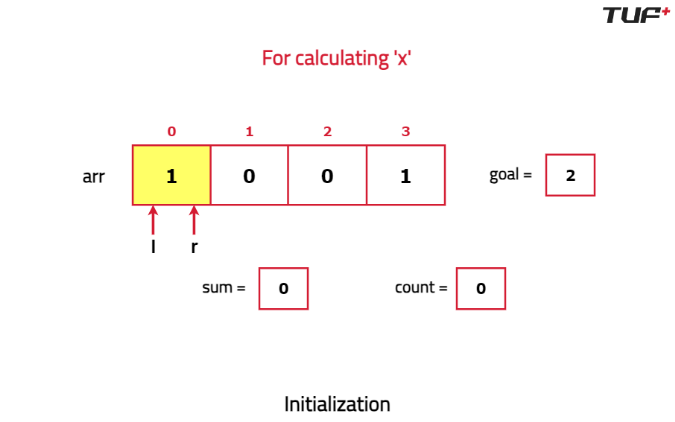
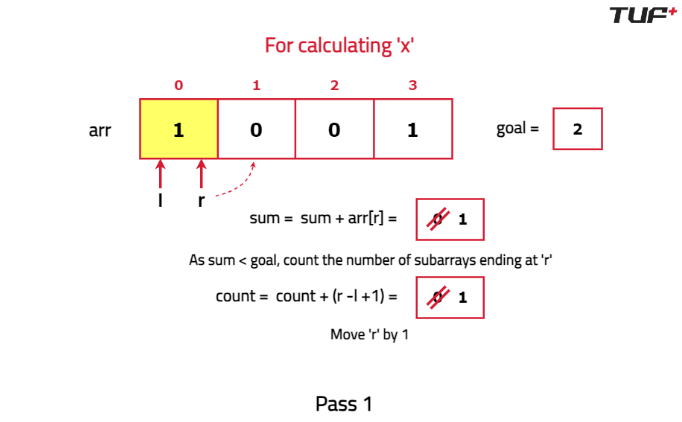
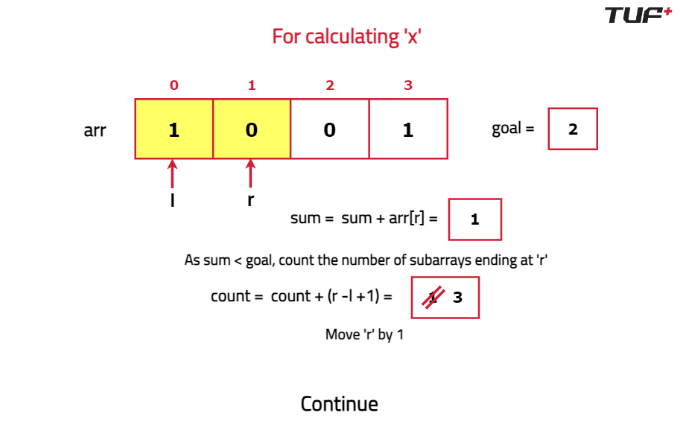
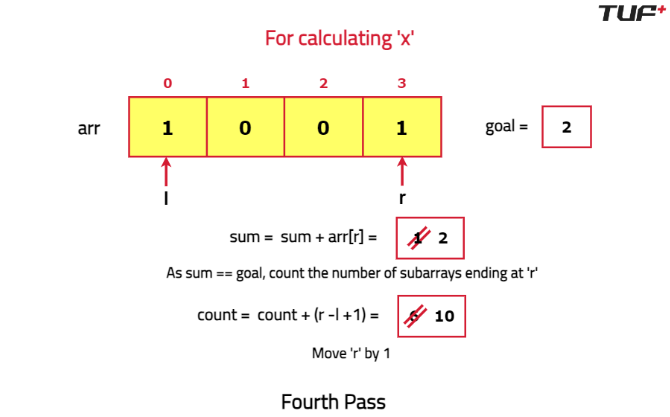
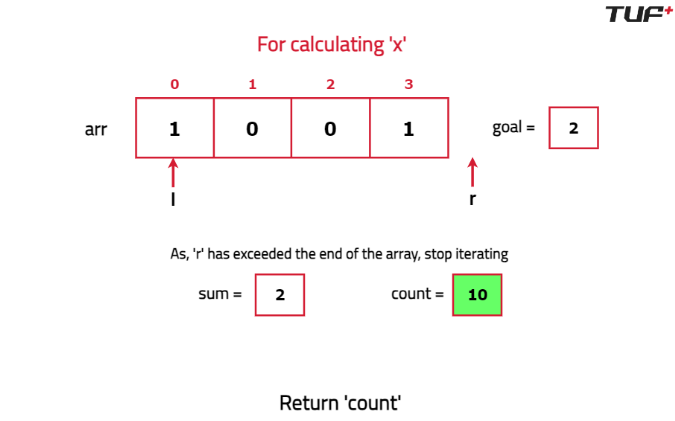

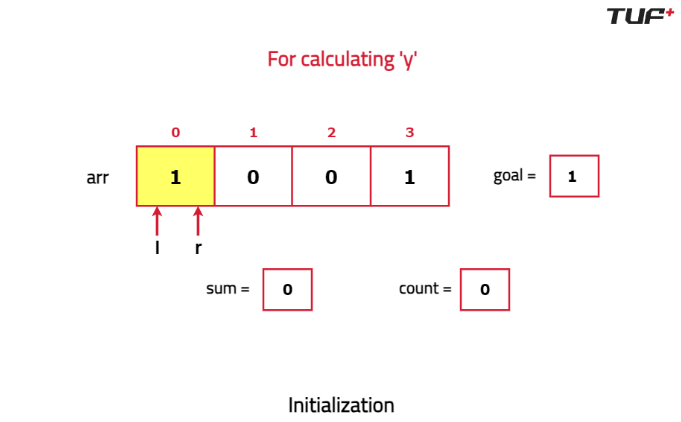
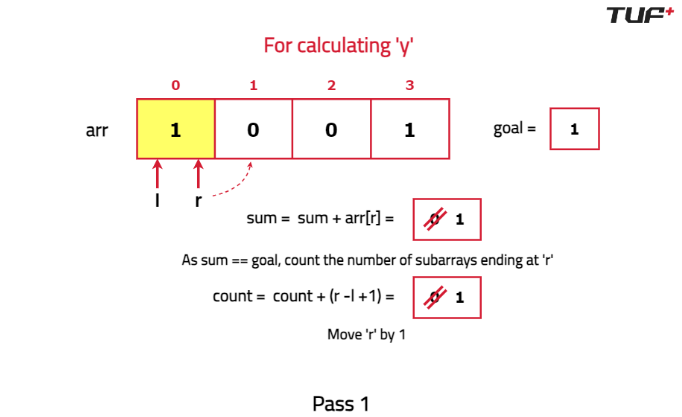
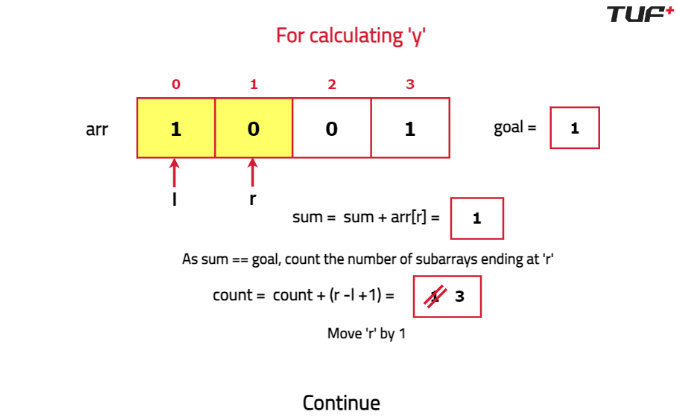
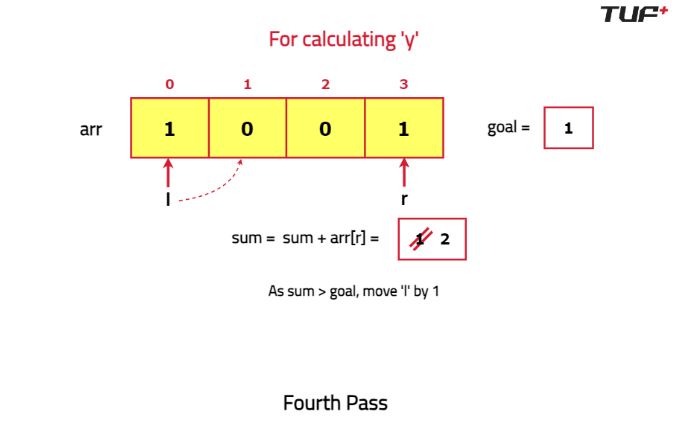
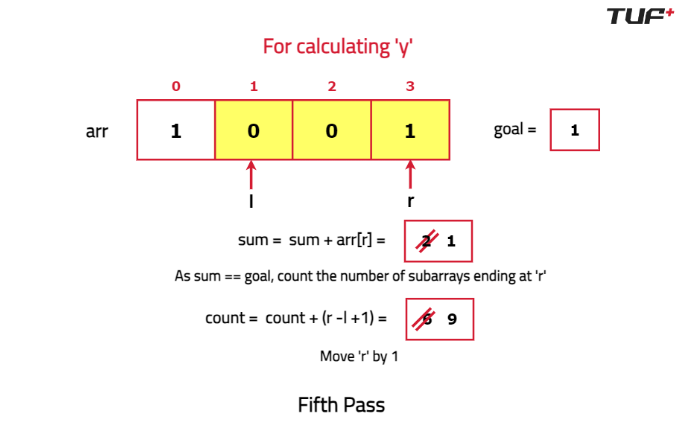
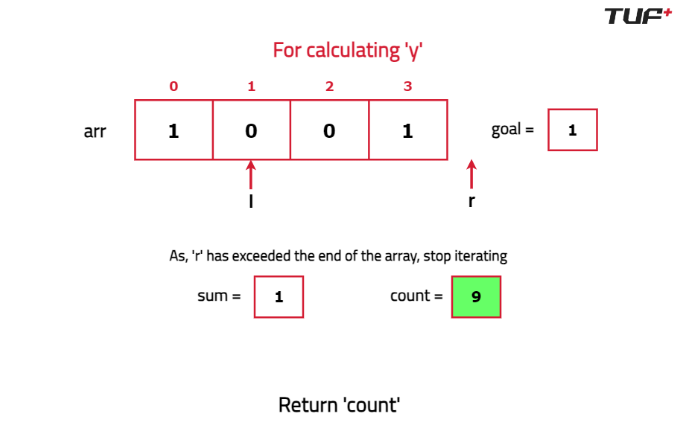

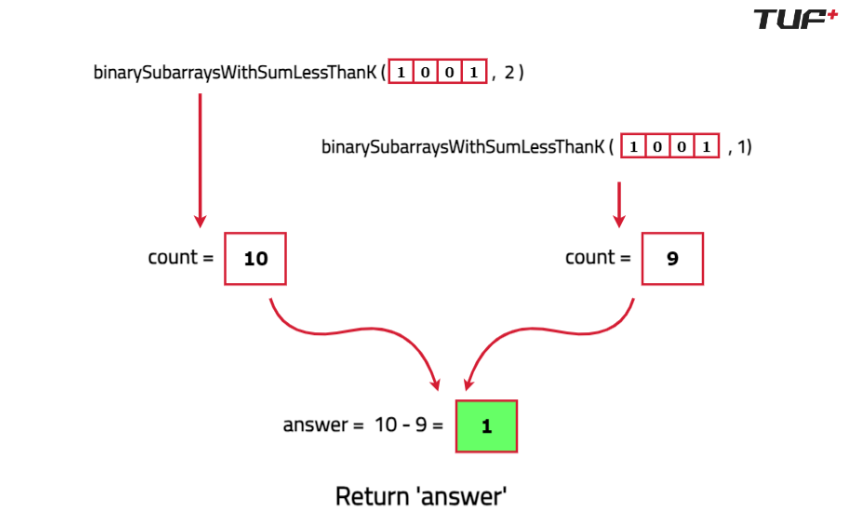

## Optimal Python Solution

In [31]:
from typing import List

class Solution:
    """ Function to find the number of 
    nice subarrays with k odd numbers` """
    def numberOfOddSubarrays(self, nums: List[int], k: int) -> int:
        """ Calculate the number of subarrays with 
        sum exactly equal to `k` by using the 
        difference between subarrays with sum less
        than or equal to `k` and those with sum
        less than or equal to `k-1` """
        return self.helper(nums, k) - self.helper(nums, k - 1)
    
    """ Helper function to find the number of 
    subarrays with sum less than or equal to `goal` """
    def helper(self, nums: List[int], goal: int) -> int:
        """ If goal is negative, there 
        can't be any valid subarray sum """
        if goal < 0:
            return 0
        
        # Pointers to maintain the current window
        l, r = 0, 0 
        
        """ Variable to track the current
        sum of elements in the window"""
        sum_val = 0     
        
        # Variable to count the number of subarrays
        count = 0   
        
        # Iterate through the array 
        while r < len(nums):
            sum_val += nums[r] % 2
            
            """ Shrink the window from the left
            side if the sum exceeds `goal` """
            while sum_val > goal:
                sum_val -= nums[l] % 2
                
                # Move the left pointer `l` forward
                l += 1
            
            """ Count all subarrays ending at
            `r` that satisfy the sum condition """
            count += (r - l + 1)
            
            # Move the right pointer `r` forward 
            r += 1 
        
        # Return the total count of subarrays
        return count

In [32]:
# Example usage:
if __name__ == "__main__":
    nums = [1, 1, 2, 1, 1]
    k = 1
    
    # Create an instance of Solution class
    sol = Solution()
    
    ans = sol.numberOfOddSubarrays(nums, k)
    
    # Print the result
    print(f"Number of nice subarrays with \"{k}\" odd numbers is: {ans}")

Number of nice subarrays with "1" odd numbers is: 6


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(2*2N), where N is the size of the array. The outer loop runs for N times and the inner while loop might be running for N time throughout the program. So the total becomes O(2N). Also since the helper function is being called twice therefore the overall time complexity becomes O(2*2N).
```

**Space Complexity:**
```
The Space Complexity will be O(1) as there is no extra space being used.
```

## FAQs & Interview Follow-ups :

**How does the sliding window approach handle overlapping subarrays?**
```
The sliding window approach dynamically adjusts the subarray boundaries to count all valid subarrays efficiently without recalculating overlapping subarrays.
```

**Why use prefix sums for this problem?**
```
The prefix sum allows you to count subarrays with a specific number of odd numbers efficiently by checking for specific differences in cumulative sums.
```

**How would you modify the solution to handle multiple values of k?**
```
Extend the prefix sum or sliding window logic to handle each k value separately or track counts dynamically using an advanced data structure like a Fenwick tree.
```

# 7. Number of Substrings containing all 3 Characters :

## Problem Statement :

<b> Given a string s, consisting only of characters 'a' , 'b' , 'c'. Find the number of substrings that contain at least one occurrence of all these characters 'a','b','c'.</b>


### Examples :

**Example 1:**
```
Input : s = "abcba"
Output : 5

Explanation : The substrings containing at least one occurrence of the characters 'a' , 'b' , 'c' are "abc", "abcb", "abcba" ,"bcba","cba".
```

**Example 2:**
```
Input : s = "ccabcc"
Output : 8

Explanation : The substrings containing at least one occurrence of the characters 'a' , 'b' , 'c' are "ccab" , "ccabc" , "ccabcc" , "cab" , "cabc" , "cabcc" , "abc" , "abcc".
```

```
Constraints:
1 <= s.length <= 5*10^4
s consist only of characters 'a' , 'b' , 'c'.
```

# Brute Force Solution

## Intuition

Here, the idea is to find all possible substrings of the given string and while doing so, mark the presence of each character in the hash array. If 'a', 'b', 'c' are present in the current subarray increment the count and finally return it.

## Approach

* Initialize count to 0 to keep track of the number of valid substrings found.
* Iterate through the array using a loop, to reach every staring point of the substring. Use an array hash of size 3 to track the presence of characters 'a', 'b', 'c'. Initialize it to {0} at the beginning of each iteration of the outer for loop.
* Now, initialize another for loop from starting point of the substring till the end of the array. Mark the presence of the current character in the hash array.
* After marking the current character in hash, check if all characters 'a', 'b', 'c' are present by summing up hash[0] + hash[1] + hash[2]. If the sum equals 3, increment the count as it indicates that the substring from index i to j contains all required characters. After completing the loops, finally return the count variable.

## Brute Force Python Solution

In [33]:
class Solution:
    """ Function to find the number of substrings 
    containing all characters 'a', 'b', 'c' in string s. """
    def numberOfSubstrings(self, s: str) -> int:
        count = 0
        
        # Iterate through each starting point of substring
        for i in range(len(s)):
            
            # Array to track presence of 'a', 'b', 'c'
            hash = [0, 0, 0]
            
            # Iterate through each ending point of substring
            for j in range(i, len(s)):
                
                # Mark current character in hash
                hash[ord(s[j]) - ord('a')] = 1
                
                # Check if all characters 'a', 'b', 'c' are present
                if sum(hash) == 3:
                    
                    # Increment count for valid substring
                    count += 1
        
        # Return the total count of substrings
        return count

In [34]:
if __name__ == "__main__":
    s = "bbacba"
    
    # Create an instance of Solution class
    sol = Solution()
    
    ans = sol.numberOfSubstrings(s)
    
    # Print the result
    print(f"Number of substrings containing 'a', 'b', 'c' in \"{s}\" is: {ans}")

Number of substrings containing 'a', 'b', 'c' in "bbacba" is: 9


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($N^2$), where N is the size of the string. The outer loop runs for N times and for each character the inner loop also runs for N times.

**Space Complexity:**

The Space Complexity will be O(1) as no significant amount of extra space is used.

# Optimal Solution

## Intuition

The idea here is to use a for loop to iterate through the array. While moving forward in the array update the last seen of 'a', 'b', 'c' in the hash array. Now, check if the current substring has atleast one of each 'a', 'b', 'c'. If so, then the previous substrings must be having these characters too, and hence we can add all such substrings to the count varaible and return it.

## Approach

* First, initialize few variables: An arraylastSeen of size 3 ({-1, -1, -1}) to store the last seen index of characters 'a', 'b', 'c' respectively, count to 0 to keep track of the number of valid substrings found.
* Use a loop to iterate through each character in the string. Update the lastSeen array for the current character. After updating lastSeen, check if all characters 'a', 'b', 'c' have been seen at least once.
* Add the calculated count to count. After iterating through all characters in string, return count.

## Dry Run

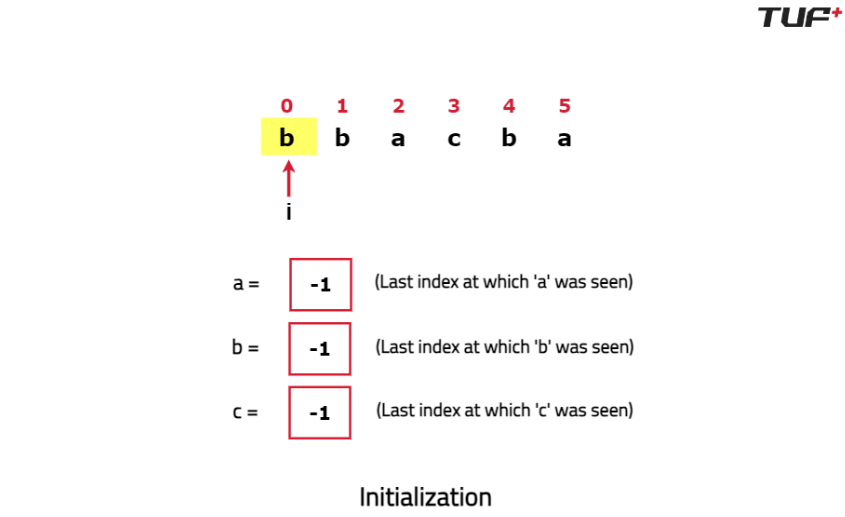
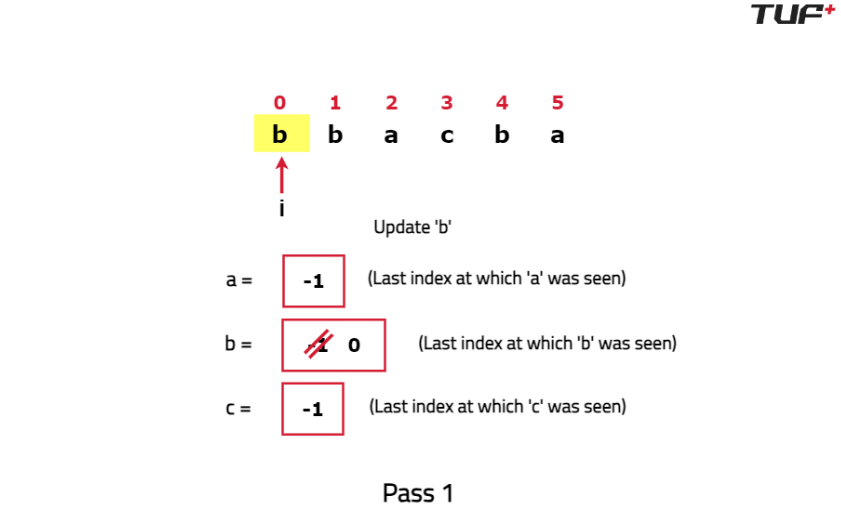
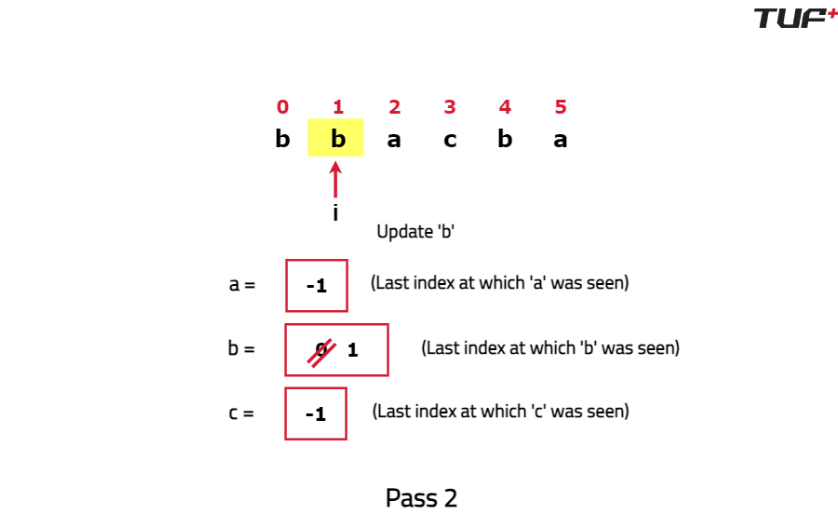
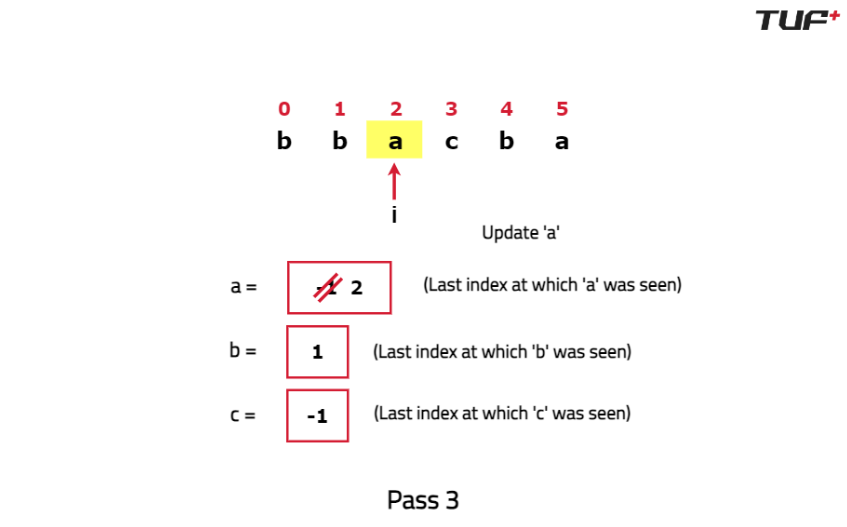
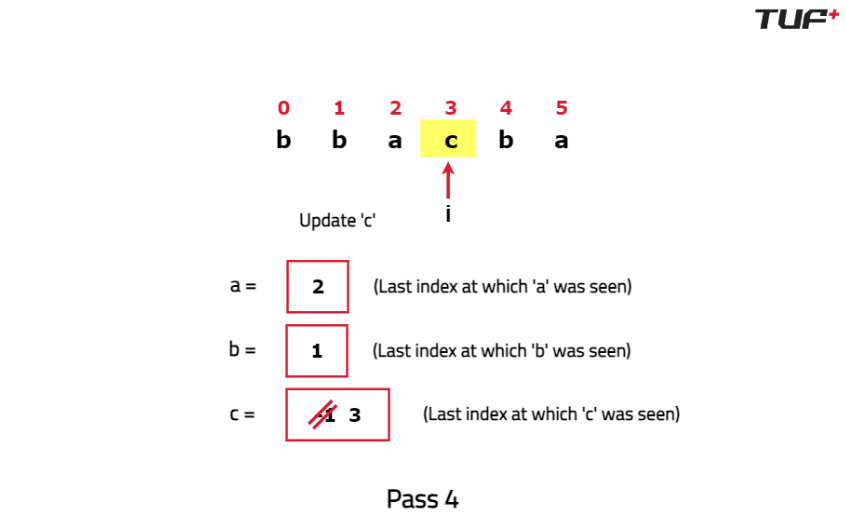

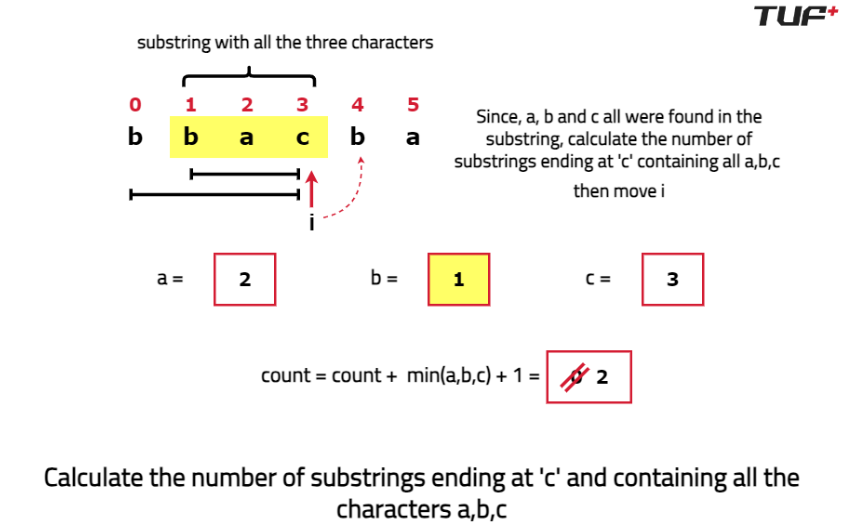
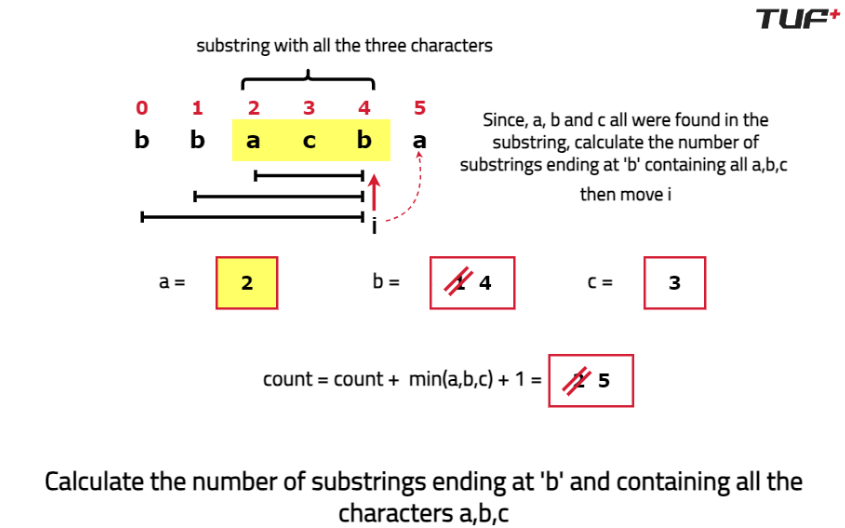
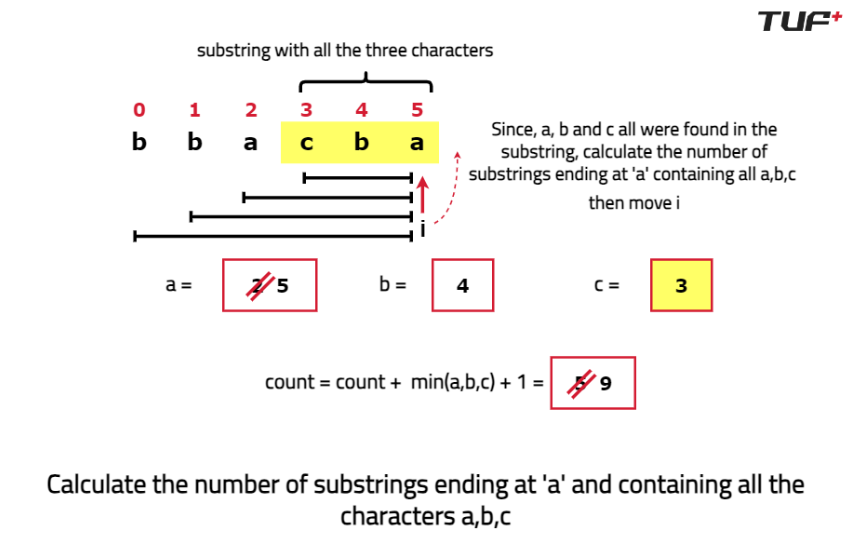
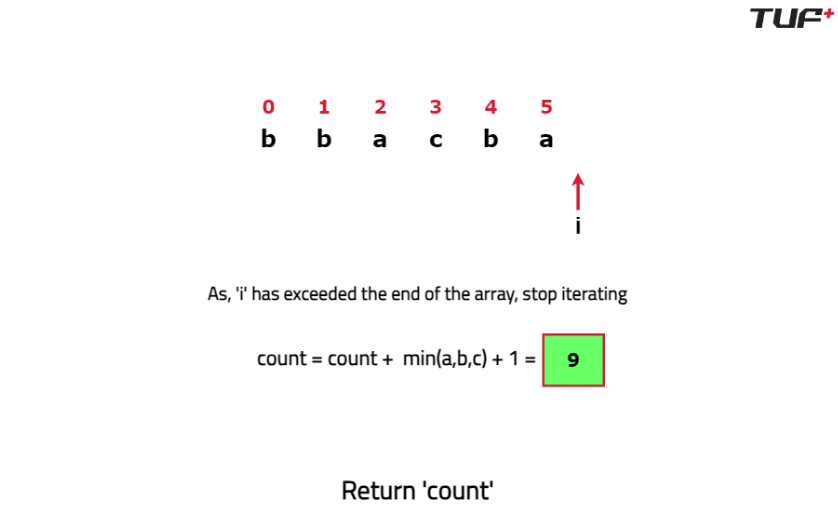

## Optimal Python Solution

In [35]:
class Solution:
    """ Function to find the number of substrings 
    containing all characters 'a', 'b', 'c' in string s. """
    def numberOfSubstrings(self, s: str) -> int:
        
        """Array to store the last seen 
        index of characters 'a', 'b', 'c'"""
        last_seen = [-1, -1, -1]
        
        count = 0
        
        # Iterate through each character in string s
        for i in range(len(s)):
            
            """ Update last_seen index
            for current character"""
            last_seen[ord(s[i]) - ord('a')] = i
            
            """ Check if all characters 'a',
            'b', 'c' have been seen"""
            if last_seen[0] != -1 and last_seen[1] != -1 and last_seen[2] != -1:
                
                """ Count valid substrings 
                ending at current index"""
                count += 1 + min(last_seen[0], last_seen[1], last_seen[2])
        
        # Return the total count of substrings
        return count

In [36]:
# Test the solution
if __name__ == "__main__":
    s = "bbacba"
    
    # Create an instance of Solution class
    sol = Solution()
    
    ans = sol.numberOfSubstrings(s)
    
    # Print the result
    print(f"Number of substrings containing 'a', 'b', 'c' in \"{s}\" is: {ans}")

Number of substrings containing 'a', 'b', 'c' in "bbacba" is: 9


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), where N is the size of the string. The outer loop runs for N times.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no significant amount of extra space is used.
```

## FAQs & Interview Follow-ups :

**Why does shrinking the window work?**
```
Once a window satisfies the condition, shrinking it ensures you explore the smallest valid substrings while maintaining all necessary characters. This reduces redundant checks.
```

**What happens if characters appear in large consecutive blocks (e.g., "aaaabbbbcccc")?**
```
The algorithm efficiently calculates valid substrings without enumerating all possible substrings. It dynamically counts substrings for each valid window, avoiding unnecessary computations.
```

**How would you extend this to handle more characters?**
```
For more characters, increase the size of the frequency map and apply the same sliding window logic. The algorithm's efficiency remains linear, as the fixed size of the map ensures constant-time updates.
```

**What if the problem asks for exactly one occurrence of each character in the substring?**
```
Modify the frequency map check to ensure each character has exactly one count in the current window before counting substrings.
```

# 8. Maximum Points you can obtain from Cards :

## Problem Statement :

Given N cards arranged in a row, each card has an associated score denoted by the cardScore array. <b> Choose exactly k cards. In each step, a card can be chosen either from the beginning or the end of the row. The score is the sum of the scores of the chosen cards.</b>

Return the Maximum Score that can be obtained.


### Examples :

**Example 1:**
```
Input : cardScore = [1, 2, 3, 4, 5, 6] , k = 3
Output : 15

Explanation :
Choosing the rightmost cards will maximize your total score. So optimal cards chosen are the rightmost three cards 4, 5, 6.
Therefore the score becomes (4 + 5 + 6) => 15.
```

**Example 2:**
```
Input : cardScore = [5, 4, 1, 8, 7, 1, 3] , k = 3
Output : 12

Explanation :
In first step we will choose card from beginning with score of 5.
In second step we will choose the card from beginning again with score of 4.
In third step we will choose the card from end with score of 3.
The total score is 5 + 4 + 3 => 12
```

```
Constraints:
1 <= cardScore.length <= 10^5
1 <= cardScore[i] <=10^4
1 <= k <= cardScore.length
```

# Optimal Solution

## Intuition

<b> Here, the idea is to use a Window of size k. First calculate the sum of k elements from the beginning. Then, maintain the window size of k by subtracting the beginning elements from the calulated sum one by one and adding the elements from the end of the array.</b> Everytime while doing so we will keep track of the maximum sum encountered so far. This process will continue till we have subtracted all k elements from the beginning of the array from the sum, thus ensuring that we have taken every possible case in consideration.

## Approach

* First declare three variables, lSum, rSum, and maxSum - initialize them to 0.
* Then iterate in the array from 0 till k-1 and calculate the sum of elements and store it in lSum. Update maxSum to lSum.

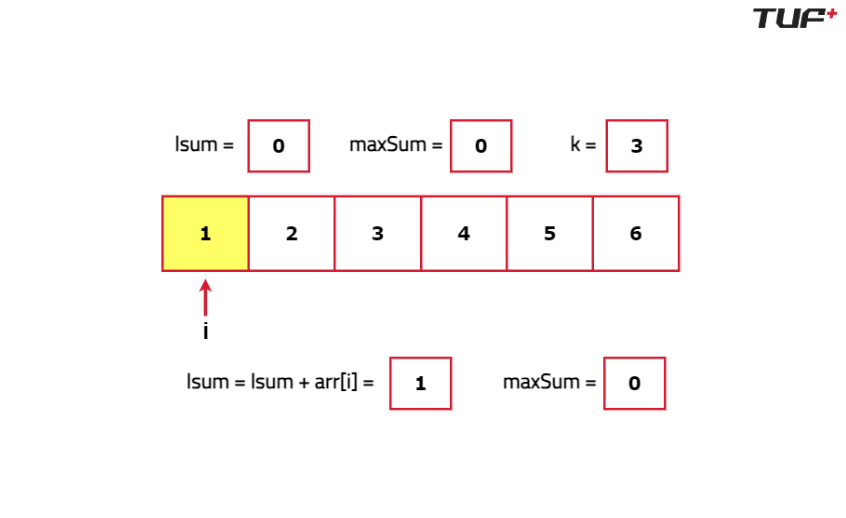
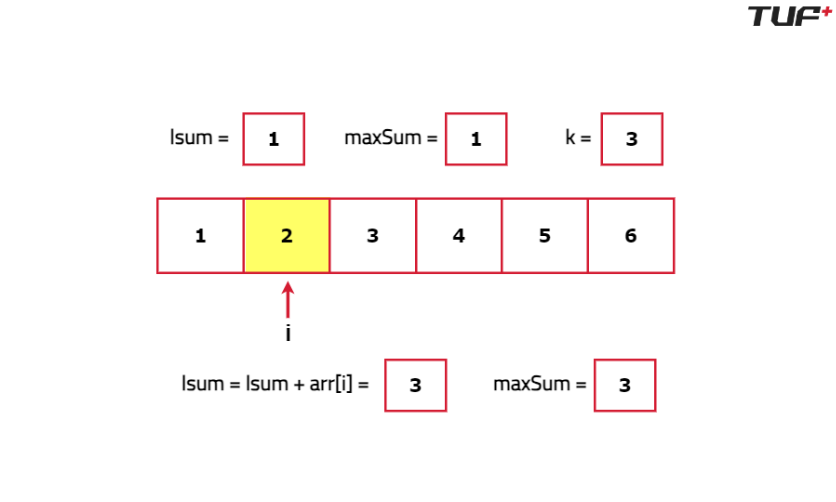
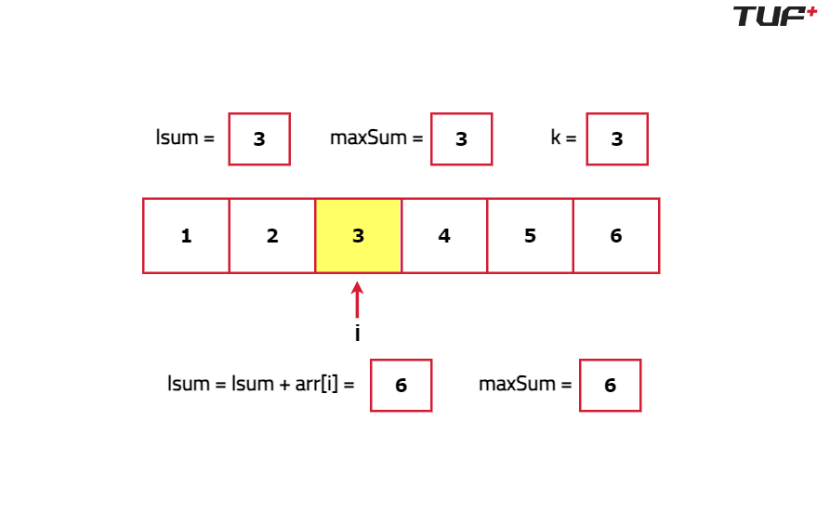
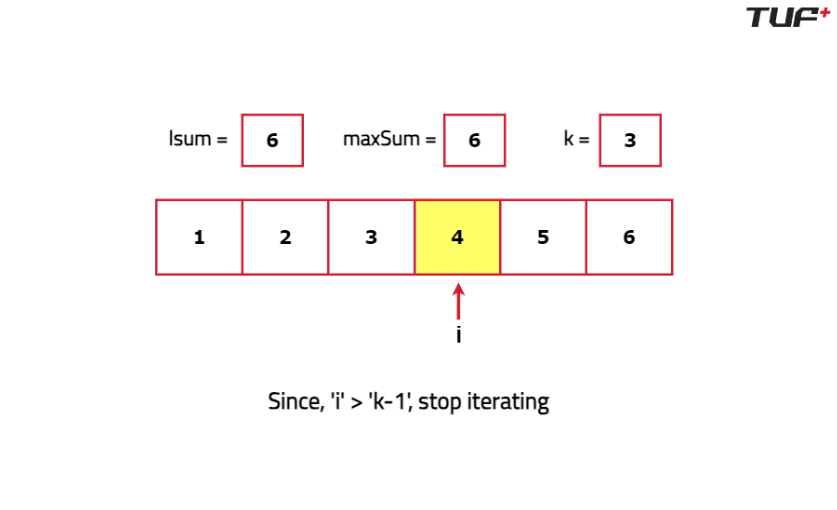

After this initialize another variable rightIndex as sizeOfArray - 1 to iterate the array from last. Then, initialize a loop say(i) from k-1 to 0. Inside this loop update rSum, lSum and maxSum accordingly and finally return maxSum as our answer.

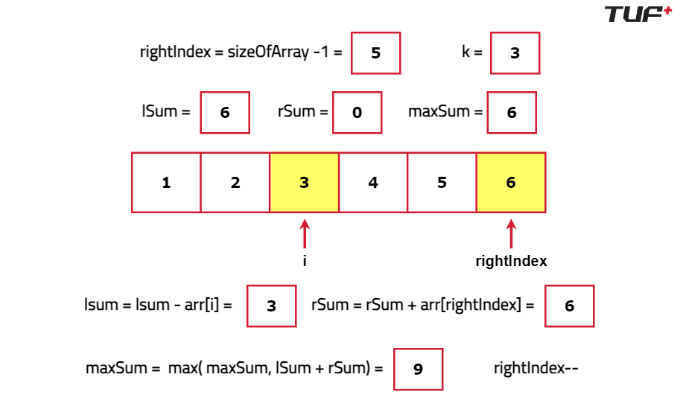
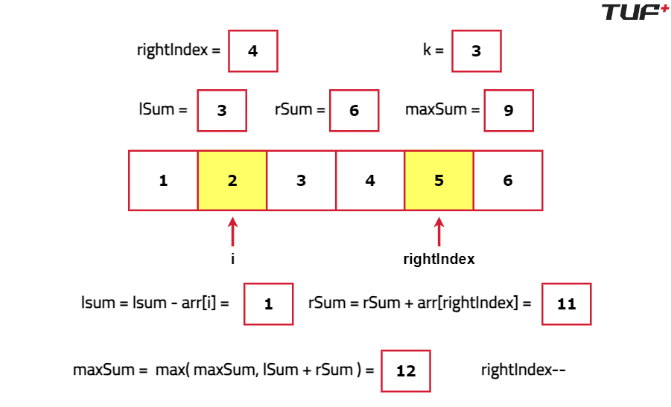
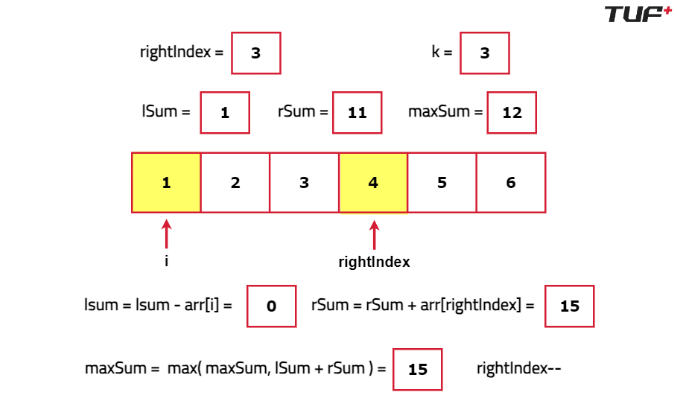
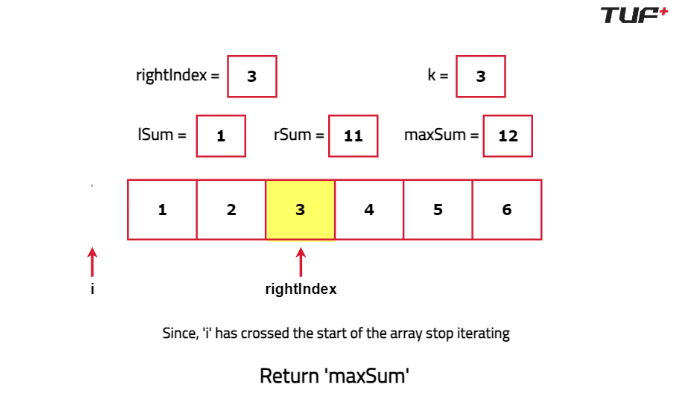

## Optimal Python Solution

In [37]:
class Solution:
    """ Function to calculate the maximum
     score after picking k cards"""
    def maxScore(self, cardScore, k):
        lSum = 0
        rSum = 0
        maxSum = 0

        # Calculate the initial sum of the first k cards
        for i in range(k):
            lSum += cardScore[i]
            
            """ Initialize maxSum with the
             sum of the first k cards"""
            maxSum = lSum

        # Initialize rightIndex to iterate array from last
        rightIndex = len(cardScore) - 1
        
        for i in range(k - 1, -1, -1):
            
            # Remove the score of the ith card from left sum
            lSum -= cardScore[i]
            
            # Add the score of the card
            # from the right to the right sum
            rSum += cardScore[rightIndex]
            
            # Move to the next card from the right
            rightIndex -= 1

            # Update maxSum with the maximum sum found so far
            maxSum = max(maxSum, lSum + rSum)

        # Return the maximum score found
        return maxSum

In [38]:
nums = [1, 2, 3, 4, 5, 6]

# Create an instance of the Solution class
sol = Solution()

result = sol.maxScore(nums, 3)

# Output the maximum score
print("The maximum score is:")
print(result)

The maximum score is:
15


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(2*k) where k is the size of the window.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

## FAQs & Interview Follow-ups :

**Why is the sliding window approach optimal?**
```
The Sliding Window ensures that each combination of i cards from the front and k−i cards from the back is considered without recomputing sums from scratch, reducing the Time Complexity.
```

**How would you modify this to allow choosing non-consecutive cards?**
```
For non-consecutive cards, the problem becomes a combinatorial selection problem, requiring dynamic programming or backtracking to explore all possible subsets of size k.
```

**How would you handle multiple players selecting cards alternately?**
```
Modify the algorithm to account for alternating turns by simulating the selection process for both players, optimizing for one while considering the opponent’s moves.
```

# 9. Longest Substring with Atmost K Distinct Characters :

## Problem Statement :

<b> Given a string s and an integer k. Find the length of the Longest Substring with at most k distinct characters.</b>


### Examples :

**Example 1:**
```
Input : s = "aababbcaacc" , k = 2
Output : 6

Explanation : The longest substring with at most two distinct characters is "aababb".
The length of the string is 6.
```

**Example 2:**
```
Input : s = "abcddefg" , k = 3
Output : 4

Explanation : The longest substring with at most three distinct characters is "bcdd".
The length of the string is 4.
```

```
Constraints:
1 <= s.length <= 10^5
1 <= k <= 26
```

# Brute Force Solution

## Intuition

The idea here is to generate all possible substrings of the given array using 2 loops and while doing so, check if the number of distinct characters in the current substring is within the allowed limit using a Map data structure. If the number of distinct characters exceed limit, then no need to consider that substring. Otherwise we can calculate the Length of the Current Substring and Update the Maximum Length of Substring.

## Approach

* First, initialize few variables as: maxLen (with value as 0), which will store the Maximum Length of substrings with at most k distinct characters, and mpp as an unordered_map to track the count of each character in the current substring.
* Iterate through each possible starting point of the substring in the string using a loop.<b> Before entering the inner loop for each new starting point, clear the map. This ensures that we start counting characters fresh for the new window.</b>
* Use another loop from strating point of the substring till sizeOfArray - 1, to expand the window and include more characters in the substring. Add each character to the map and increment its count.
* Check if the number of distinct characters is within the limit k. If so, calculate the length of the current valid substring. Update Maximum Length of the Substring. Else, break out of the loop. Finally, return the maxLen variable as an answer.

## Brute Force Python Solution

In [39]:
class Solution:
    """ Function to find the maximum length of 
    substring with at most k distinct characters """
    def kDistinctChar(self, s: str, k: int) -> int:
        
        """ Variable to store the 
        maximum length of substring"""
        maxLen = 0  
        
        """ Dictionary to track the count of each
        character in the current window"""
        mpp = {}
        
        """ Iterate through each starting
        point of the substring"""
        for i in range(len(s)):
            # Clear dictionary for a new starting point
            mpp.clear()
            
            for j in range(i, len(s)):
                
                # Add the current character to the dictionary
                if s[j] in mpp:
                    mpp[s[j]] += 1
                else:
                    mpp[s[j]] = 1
                
                """ Check if the number of distinct 
                characters is within the limit"""
                if len(mpp) <= k:
                    
                    """ Calculate the length of
                    the current valid substring"""
                    maxLen = max(maxLen, j - i + 1)
                else:
                    break
        
        # Return the maximum length found
        return maxLen

In [40]:
if __name__ == "__main__":
    s = "aaabbccd"  
    k = 2
    
    # Create an instance of Solution class
    sol = Solution()
    
    length = sol.kDistinctChar(s, k)
    
    # Print the result
    print(f"Maximum length of substring with at most {k} distinct characters: {length}")

Maximum length of substring with at most 2 distinct characters: 5


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^2$), where N is the length of the string. This is because for every element of the array the inner loop runs for N times.

**Space Complexity:**

The Space Complexity will be O(k), because the map data structure is holding k elements in the worst case scenario.

# Better Solution

## Intuition

Here, the idea is to use Sliding Window approach with hashMap to solve this problem in an optimal way. This technique ensures to find the longest substring with at most k distinct characters efficiently by maintaining a Sliding Window and using a hashmap to keep track of character frequencies within the window.

## Approach

* First, initialize few variables: l and r pointers to 0 which represent the left and right boundaries of the current window respectively. maxLen is initialized to 0 to store the Maximum Length of substring with at most k distinct characters found so far, mpp as a hashMap is used to track the frequency of characters within the current window.
* Use r pointer to expand the window by iterating through each character of the string. Increment the frequency of the current character in the mpp HashMap.
* Check if the number of distinct characters exceeds k. If so, maintain k distinct characters by decrementing the frequency of the character at l pointer. If the frequency becomes zero, remove that character from the map. Move l pointer to the right to shrink the window.
* Continue expanding r until it reaches the end of the string. Return maxLen as an answer.

## Dry Run

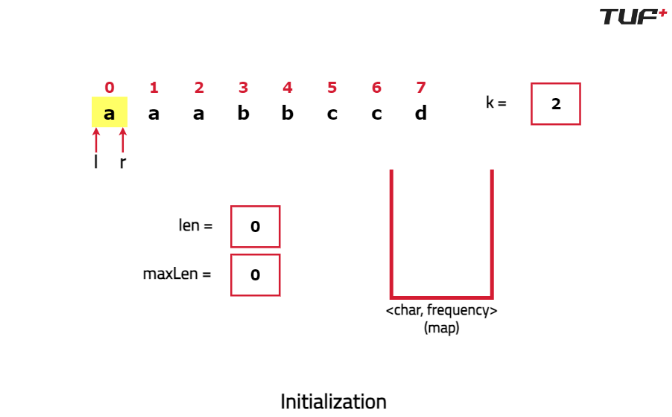
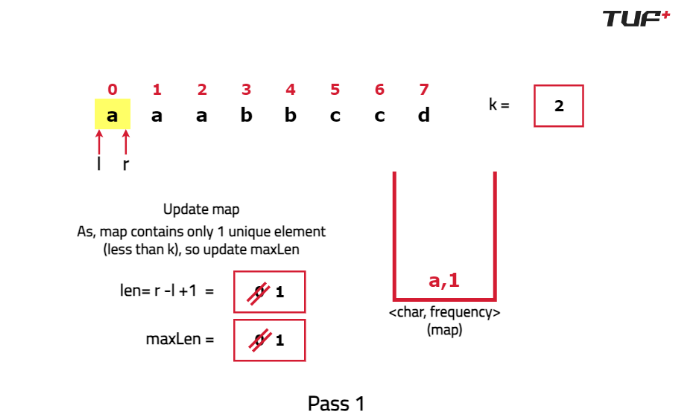
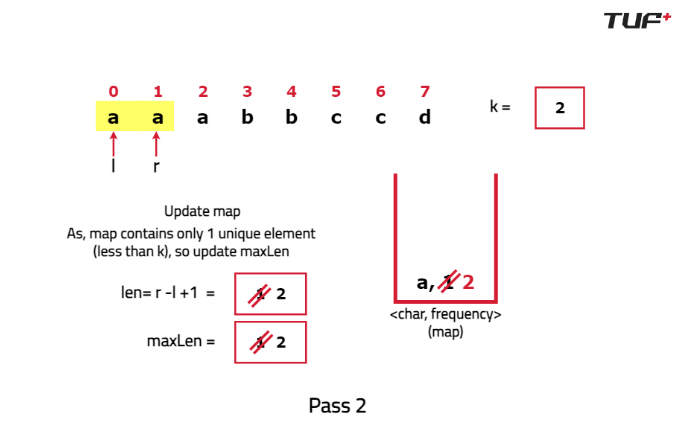
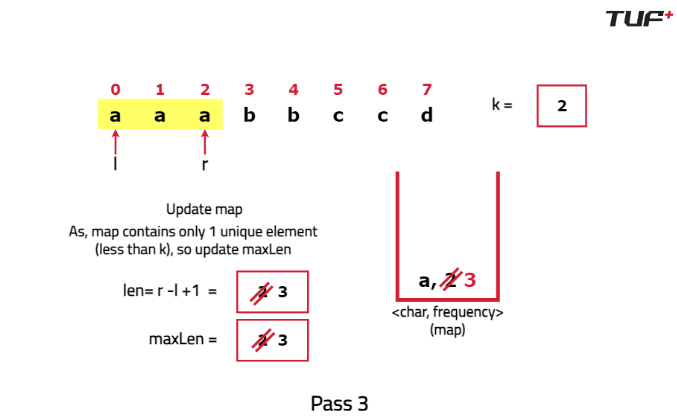
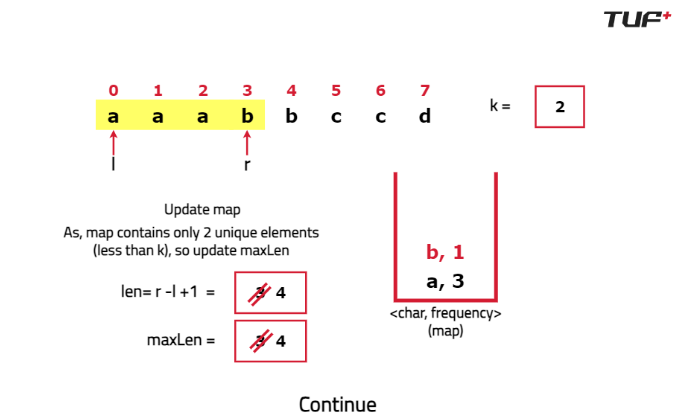

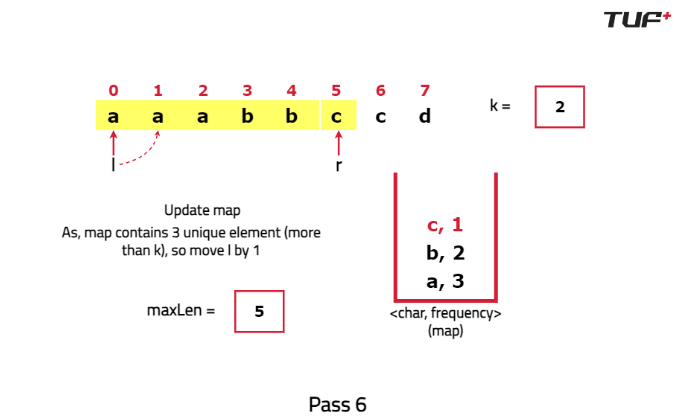
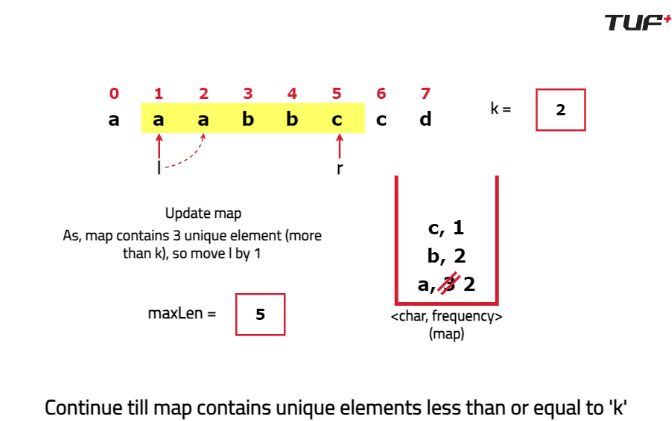
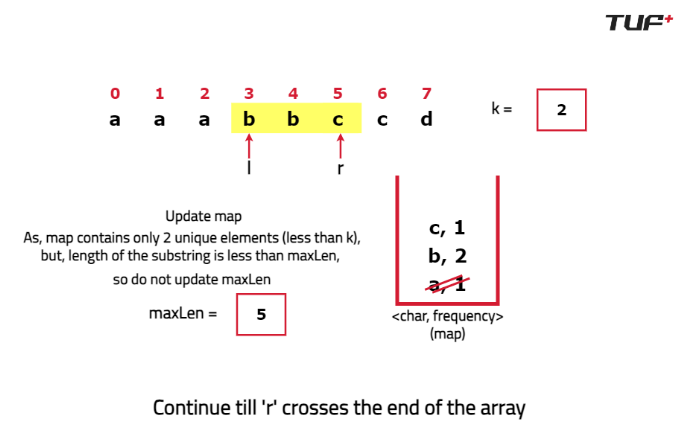
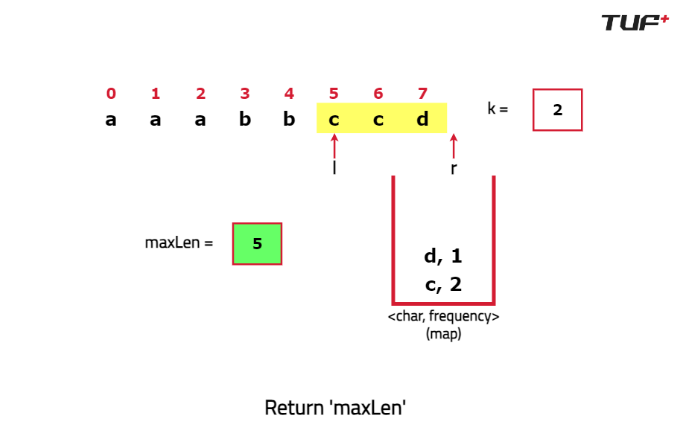

## Better Python Solution

In [41]:
class Solution:
    """ Function to find the length of the longest 
    substring with at most k distinct characters """
    def kDistinctChar(self, s, k):
        
        """ Initialize left pointer, right pointer,
        and maximum length of substring"""
        l, r, maxLen = 0, 0, 0
        
        # Hash map to store character frequencies
        mpp = {}
        
        while r < len(s):
            
            # Increment frequency of current character
            if s[r] in mpp:
                mpp[s[r]] += 1
            else:
                mpp[s[r]] = 1
            
            """ If the number of distinct characters 
            exceeds k, shrink the window from the left"""
            while len(mpp) > k:
                
                # Decrement frequency of character at left pointer
                mpp[s[l]] -= 1
                if mpp[s[l]] == 0:
                    
                    """ Remove character from map 
                    if its frequency becomes zero"""
                    del mpp[s[l]]
                    
                # Move left pointer to the right
                l += 1
            
            """ Update maximum length of substring with
            at most k distinct characters found so far"""
            if len(mpp) <= k:
                maxLen = max(maxLen, r - l + 1)
            
            # Move right pointer
            r += 1
        
        # Return the maximum length found
        return maxLen

In [42]:
if __name__ == "__main__":
    s = "aaabbccd"
    
    #Create an instance of Solution class
    sol = Solution()
    
    res = sol.kDistinctChar(s, 2)
    
    # Output the result
    print(f"The maximum length of substring with at most 2 distinct characters is: {res}")

The maximum length of substring with at most 2 distinct characters is: 5


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(2N), where N is the length of the string. This is because the other while loop runs for N times and the inner while loop runs for N times in total throughout the program. Ignore the contribution of map data structure in the Time Complexity as size of the map is extremely small.
```

**Space Complexity:**
```
The Space Complexity will be O(k), as at most the Map Data Structure is holding k elements.
```

# Optimal Solution

## Intuition

<b> The idea here is to use the Sliding Window approach by avoiding the additional O(N) Time Complexity incurred when shifting the window entirely in the Better solution, to ensure that no more than k distinct characters occur in the current substring.</b> Instead of moving the left pointer (l) completely till the distinct character comes under given limit, shift the window by one position at a time. This way the extra while loop used in Better Solution approach can be eliminated.

## Approach

* First, initialize few variables: l and r pointers to 0 to represent the left and right boundaries of the current window, maxLen is initialized to 0 to keep track of the Maximum Length of Substring with at most k distinct characters and mpp (unordered_map) is used to track the count of each character in the current sliding window.
* Iterate through the string using the r pointer to expand the window, increment the count of element at r pointer in the map. If the number of different characters exceeds k, shrink the window from the left (l++). Decrement the count of element at left pointer in the map.
* If the count of element at left pointer becomes 0, remove it from the map. Increment l pointer to move the left boundary of the window to the right until size of map again becomes less than or equals to k.
* Whenever size of map is less than or equal to k, calculate the length of the current valid substring. Update maxLen to store the maximum length found so far. Continue expanding r pointer until it reaches the end of the string. After iterating through the entire string return maxLen.

## Optimal Python Solution

In [43]:
class Solution:
    """ Function to find the maximum length of 
    substring with at most k distinct characters """
    def kDistinctChar(self, s, k):
        
        # Length of the input string
        n = len(s)
        
        # Variable to store the 
        # maximum length of substring
        maxLen = 0
        
        # Map to track the count of each
        # character in the current window
        mpp = {}
        
        # Pointers for the sliding window approach
        l, r = 0, 0
        
        while r < n:
            charR = s[r]
            mpp[charR] = mpp.get(charR, 0) + 1
            
            # If number of different characters exceeds
            # k, shrink the window from the left
            if len(mpp) > k:
                charL = s[l]
                mpp[charL] -= 1
                if mpp[charL] == 0:
                    del mpp[charL]
                l += 1
            
            # If number of different characters 
            # is at most k, update maxLen
            if len(mpp) <= k:
                maxLen = max(maxLen, r - l + 1)
            
            r += 1
        
        # Return the maximum length
        return maxLen

In [44]:
if __name__ == "__main__":
    s = "aaabbccd"  
    k = 2
    
    # Create an instance of Solution class
    sol = Solution()
    
    length = sol.kDistinctChar(s, k)
    
    # Print the result
    print(f"Maximum length of substring with at most {k} distinct characters: {length}")

Maximum length of substring with at most 2 distinct characters: 5


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), where N is the length of the string. This is because the other while loop runs for N times only. Ignore the contribution of map data structure in the Time Complexity as size of the map is extremely small.
```

**Space Complexity:**
```
The Space Complexity will be O(k), as at most the Map Data Structure is holding k elements.
```

## FAQs & Interview Follow-ups :

**Why does the sliding window approach work for this problem?**
```
We need a Contiguous Substring, and the Sliding Window dynamically expands and shrinks based on the number of distinct characters. Since each character is added once and removed once, the approach runs in O(n) time complexity.
```

**How do we handle edge cases like s = "", k = 0, or k = 1?**
```
If s is empty, return 0. If k = 0, no valid substring exists, return 0. If k = 1, find the longest contiguous sequence of the most frequent character.
```

**Can this problem be solved using a different approach apart from sliding window?**
```
Brute Force Approach: Generate all substrings and count distinct characters (O(n²) or O(n³)). Binary Search on Length: Check if a substring of a given length can exist with at most k distinct characters (O(n log n)).
```

**What if we are asked to return the substring itself instead of just the length?**
```
Track the start index and end index of the longest valid window. Instead of returning just the length, return s[start:end+1].
```

# 10. Subarray with K Different Integers :

## Problem Statement :

You are given an integer array nums and an integer k.

<b>Return the number of good subarrays of nums. A good subarray is defined as a contiguous subarray of nums that contains exactly k distinct integers.</b>

A subarray is a contiguous part of the array.


### Examples :

**Example 1:**
```
Input: nums = [1, 2, 1, 2, 3], k = 2  
Output: 7  

Explanation:
The 7 subarrays with exactly 2 different integers are:  
[1,2], [2,1], [1,2], [2,3], [1,2,1], [2,1,2], [1,2,1,2]
```

**Example 2:**
```
Input: nums = [1, 2, 1, 3, 4], k = 3  
Output: 3  

Explanation:
The 3 subarrays with exactly 3 different integers are:  
[1,2,1,3], [2,1,3], [1,3,4]
```

```
Constraints:
1 <= nums.length <= 2 * 10^4
1 <= nums[i], k <= nums.length
```

# Optimal Solution

## Intuition

We need to count all subarrays containing exactly K distinct integers.<b> Instead of counting them directly, which is hard, we can leverage an elegant trick: count how many subarrays have at most K distinct elements, and subtract how many have at most (K−1). This works because every subarray that has exactly K distinct will appear in atMost(K) but not in atMost(K−1).<b>

## Approach

* Define a helper function atMost(nums, K) which counts subarrays with ≤ K distinct integers.
* Use a hashmap or frequency array to keep track of the count of elements in the current window.
* Expand the window by moving right pointer.
* If the number of distinct elements exceeds K, shrink from the left until valid again.
* For every valid window ending at right, add (right - left + 1) to the answer.
* Return atMost(K) - atMost(K - 1).

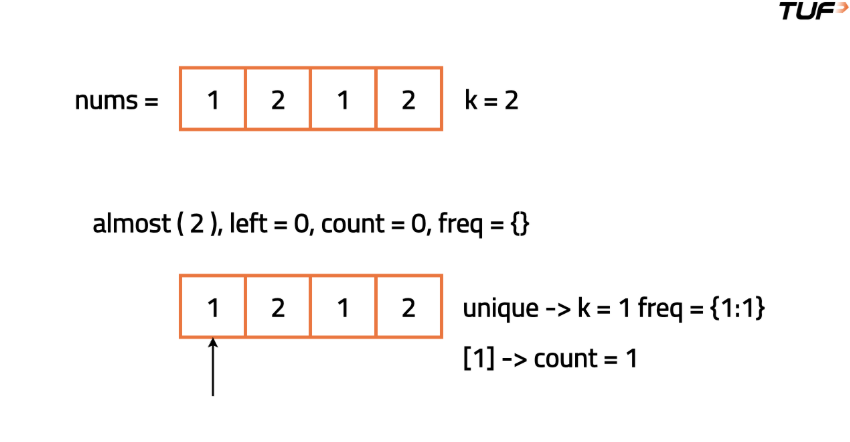
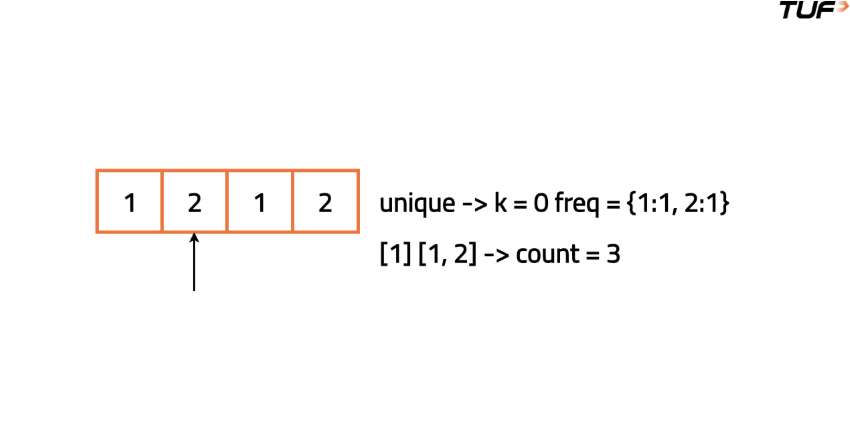
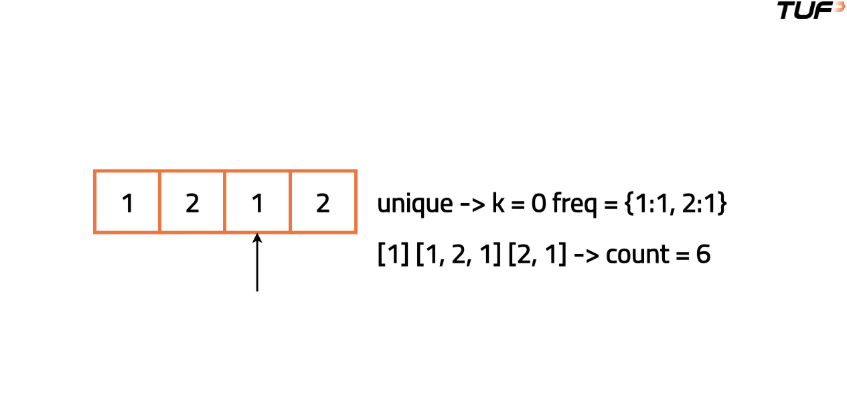
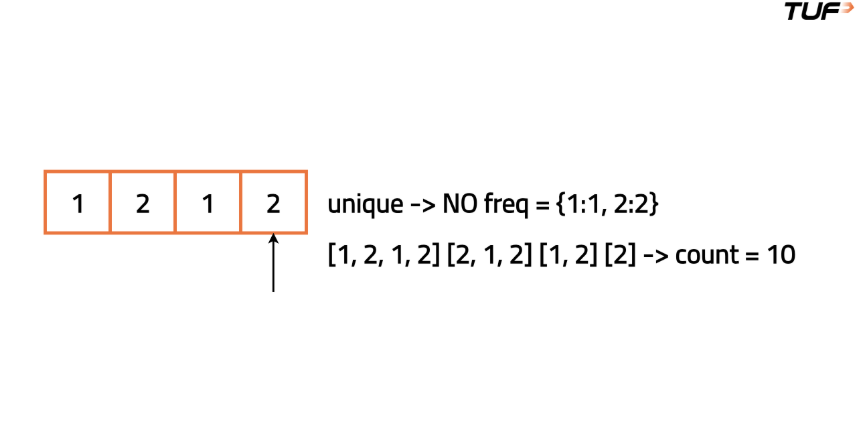
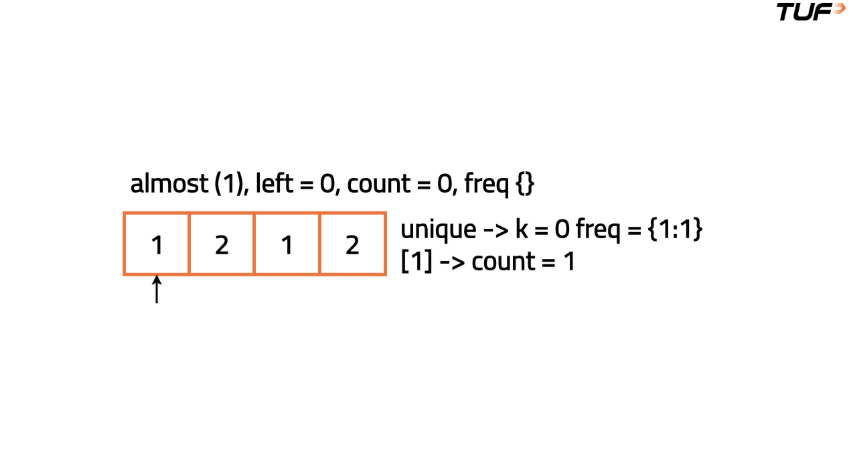

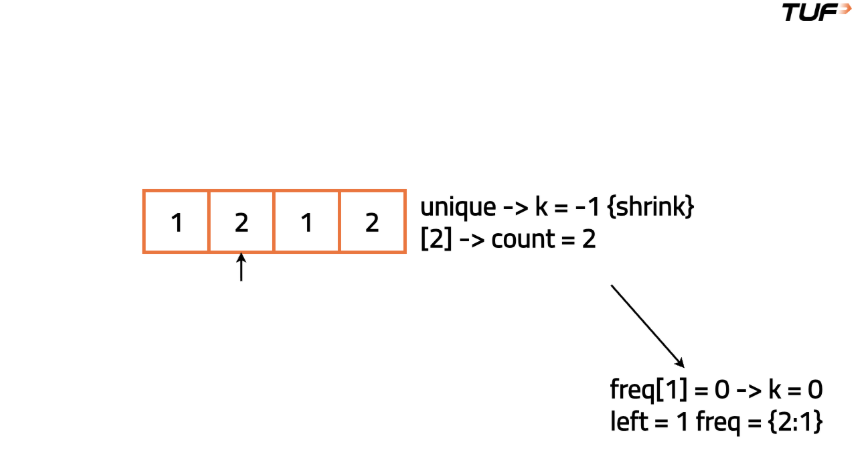
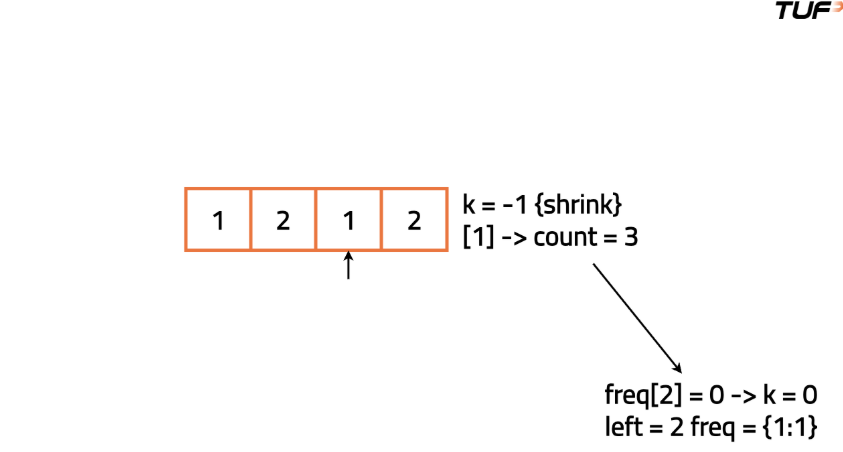
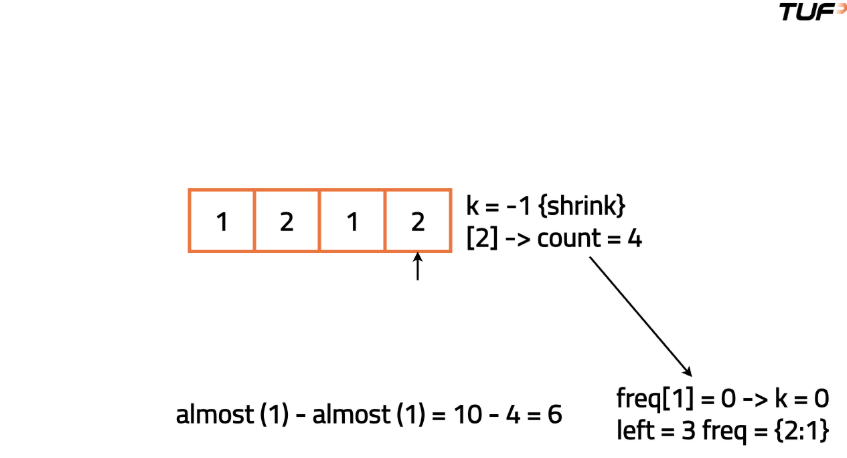

## Optimal Python Solution

In [45]:
class Solution:
    # Helper function to count subarrays with at most k distinct integers
    def atMost(self, nums, k):
        # Dictionary to store frequencies
        freq = {}
        left = result = 0

        # Traverse the array using right pointer
        for right, val in enumerate(nums):
            # Add element to frequency map
            freq[val] = freq.get(val, 0) + 1

            # If new element, reduce allowed distinct count
            if freq[val] == 1:
                k -= 1

            # Shrink the window if distinct > k
            while k < 0:
                freq[nums[left]] -= 1
                if freq[nums[left]] == 0:
                    k += 1
                left += 1

            # Add number of valid subarrays ending at right
            result += right - left + 1

        return result

    # Function to count subarrays with exactly k distinct integers
    def subarraysWithKDistinct(self, nums, k):
        # Exactly k = atMost(k) - atMost(k - 1)
        return self.atMost(nums, k) - self.atMost(nums, k - 1)

In [46]:
if __name__ == "__main__":
    sol = Solution()

    # Example 1
    print(sol.subarraysWithKDistinct([1, 2, 1, 2, 3], 2))  # 7

    # Example 2
    print(sol.subarraysWithKDistinct([1, 2, 1, 3, 4], 3))  # 3

7
3


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(n), since each element enters and leaves the sliding window at most once.
```

**Space Complexity:**
```
The Space Complexity will be O(k), for the frequency map storing distinct integers in the window.
```

# 11. Minimum Window Substring :

## Problem Statement :

Given two strings s and t. Find the Smallest Window Substring of s that <b>includes all characters in t (including duplicates), in the window.</b> Return the empty string "" if no such substring exists.


### Examples :

**Example 1:**
```
Input : s = "ADOBECODEBANC" , t = "ABC"
Output : "BANC"

Explanation : The minimum window substring of string s that contains the string t is "BANC".
```

**Example 2:**
```
Input : s = "a" , t = "a"
Output : "a"

Explanation : The Complete String is the Minimum Window.
```

```
Constraints:
1 <= n , m <= 10^5
n = s.length
m = t.length
string s and t consist of uppercase and lowercase letters.
```

# Brute Force Solution

## Intuition

The idea here is to use 2 for loops to find out all the substrings and while finding out, keep a track of the characters present in the current substring using a Hash Array. If the current substring has all the characters required, then store its starting index and return the substring.

## Approach

* First, initialize few variables: minLen to Integer, MAX_VALUE to store the Minimum Length of the Substring found and sIndex to -1 to store the starting index of this substring. Use an Array Hash of size 256 (assuming ASCII characters) to count frequencies of characters in the reference string.
* Traverse through each character in string, which will indicate the starting point of the substring. For each starting index, initialize count to 0 to track how many characters from t are found in the current substring.
* Now, again iterate through the array using a for loop form the starting point of the substring till the end of array. Update the frequency count in hash for the current character.
* If this character is required, increment count. When count equals the length of the another string given this means all characters from the later string are found in the current substring.
* Update minLen and sIndex if the length of this window (j - i + 1) is smaller than the current minimum length found. After iterating through all possible starting indices, return the substring starting at sIndex with length minLen. If sIndex remains -1, return an empty string indicating no valid substring was found.

## Brute Force Python Solution

In [47]:
class Solution:
    """
    Function to find the minimum length substring
    in string s that contains all characters from string t.
    """
    def minWindow(self, s: str, t: str) -> str:

        """ Variable to store the minimum
        length of substring found"""
        minLen = float('inf')
        
        """ Variable to store the starting index
        of the minimum length substring"""
        sIndex = -1
        
        # Iterate through string s
        for i in range(len(s)):
            """Reset list for counting current window. List to
            count frequencies of characters in string t"""
            hash = [0] * 256
            for c in t:
                hash[ord(c)] += 1
            
            count = 0;
            
            # Iterate through current window 
            for j in range(i, len(s)):
                if hash[ord(s[j])] > 0:
                    count += 1
                hash[ord(s[j])] -= 1
                
                """ If all characters from t 
                are found in current window"""
                if count == len(t):
                    
                    """ Update minLen and sIndex
                    if current window is smaller"""
                    if j - i + 1 < minLen:
                        minLen = j - i + 1
                        sIndex = i
                        
                    break  
        
        # Return the minimum length substring from s
        return s[sIndex:sIndex + minLen] if sIndex != -1 else ""

In [48]:
if __name__ == "__main__":
    s = "ddaaabbca"
    t = "abc"

    # Create an instance of Solution class
    sol = Solution()

    ans = sol.minWindow(s, t)

    # Print the result
    print(f"Minimum length substring containing all characters from \"{t}\" is: {ans}")

Minimum length substring containing all characters from "abc" is: bca


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^2$), where N is the length of the string. The outer loop runs N times and for each character the inner loop also runs for N times.

**Space Complexity:**

The Space Complexity will be O(256) since we are using a Hash array to store frequency of all the characters.

# Optimal Solution

## Intuition

The idea here is to use Sliding Window approach, which ensures to find the required result in Linear Time. So, basically, first store the frequencies of characters of the reference string into Hash Array and every time while encountering the characters of the string, decrease its frequency. After doing so if the frequency of any character is greater than 0 it means it is prefilled and the current character is needed. If the count is equal to length of reference string then update the minumum length of the substring and store its starting index.

## Approach

* First, initialize few variables: minLen to Integer, MAX_VALUE to store the Minimum Length of the substring found and sIndex to -1 to store the starting index of this substring. Use an Array Hash of size 256 (assuming ASCII characters) to count frequencies of characters in the reference string, l (left) and r (right), both initially set to 0, to define the current window in the string.
* Fill the Hash Array with frequencies of characters from string t using a loop iterating through each character in the reference string provided.
* Expand the window by incrementing r and include the character at r pointer in the current window. Adjust the frequency count in hash for current character. If the character is required, increment count.
* While count equals the length of reference string, attempt to shrink the window from the left (l) by incrementing l. Adjust the frequency count in hash for character at left pointer. If removing the character at left pointer reduces the count of required characters, decrement count.
* Continue expanding and shrinking the window until r reaches the end of string. Return the substring sIndex with length minLen. If sIndex remains -1, return an empty string indicating no valid substring was found.

## Dry Run

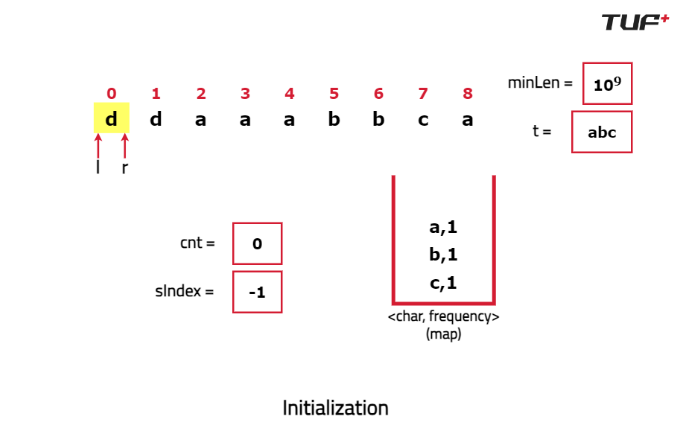
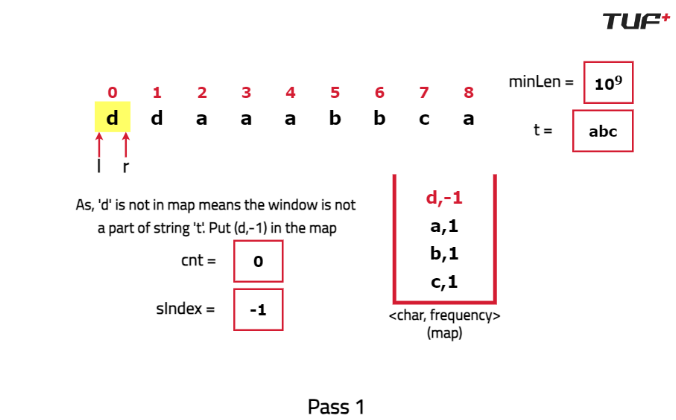
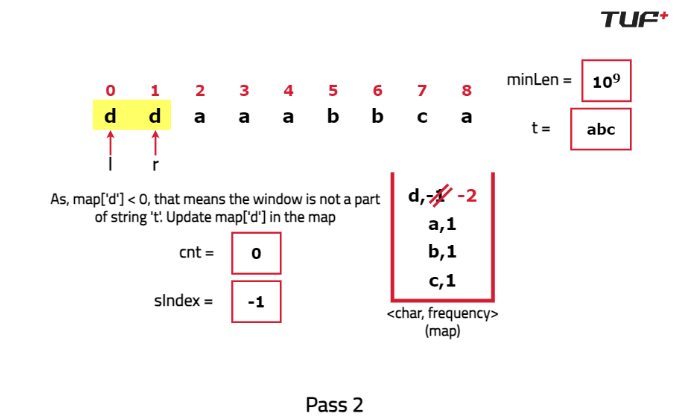
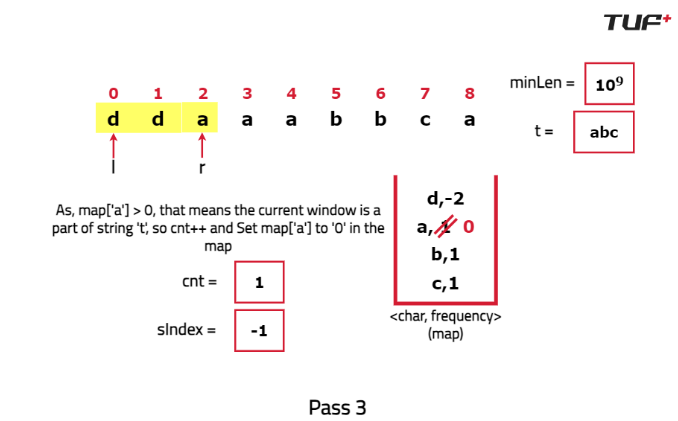
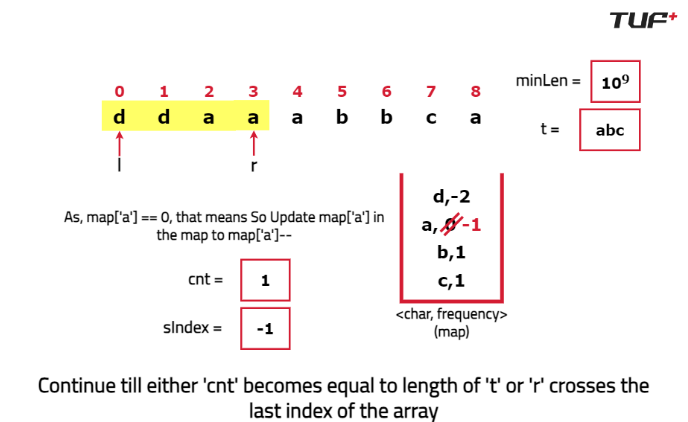

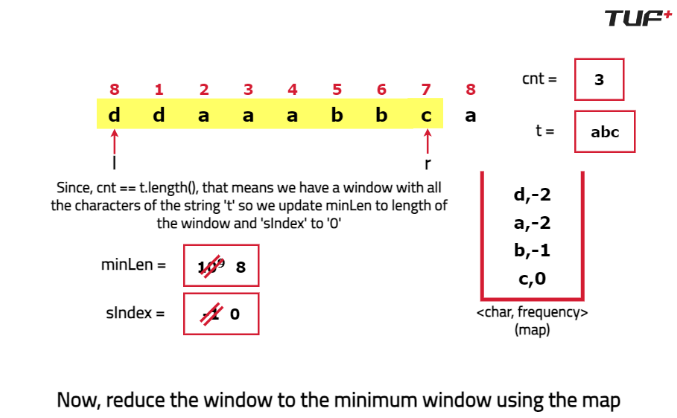
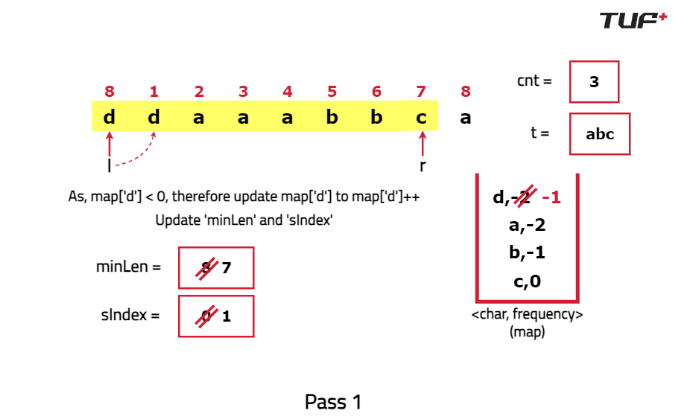
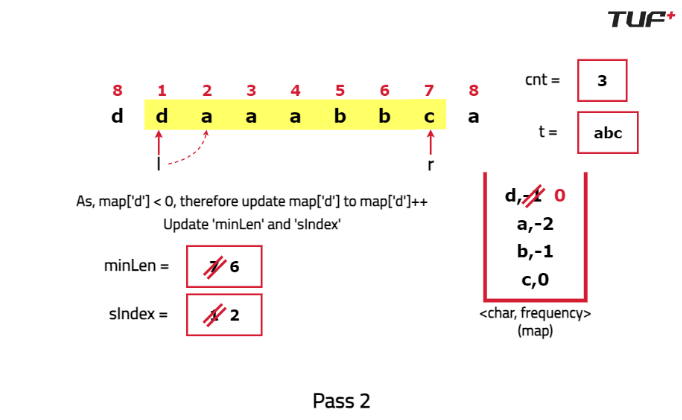

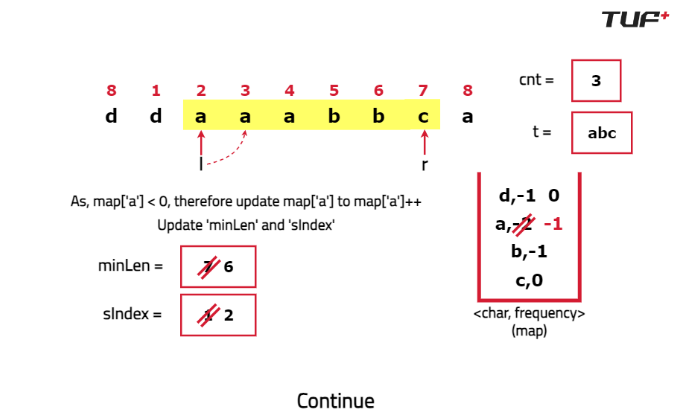
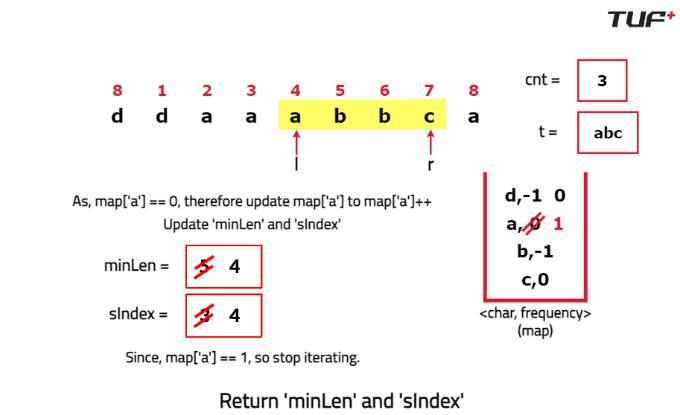
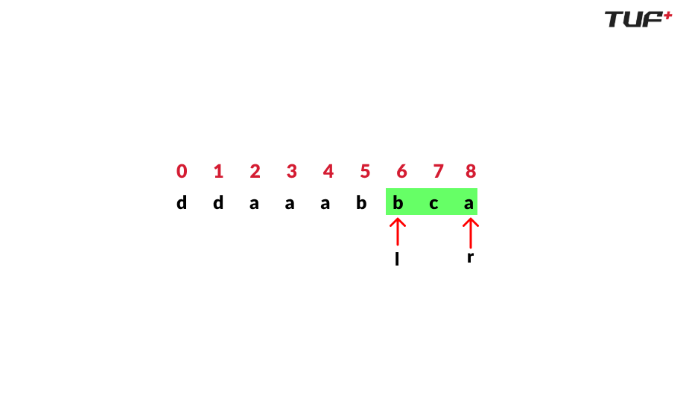

## Optimal Python Solution

In [49]:
class Solution:
    """ Function to find the minimum length 
    substring in string s that contains
    all characters from string t. """
    def minWindow(self, s: str, t: str) -> str:
        
        """ Variable to store the minimum 
        length of substring found """
        minLen = float('inf')
        
        """ Variable to store the starting index
        of the minimum length substring """
        sIndex = -1
        
        """ Array to count frequencies
        of characters in string t"""
        hash = [0] * 256
        
        # Count the frequencies of characters in t
        for c in t:
            hash[ord(c)] += 1
            
        count = 0
        l, r = 0, 0
        
        # Iterate through current window 
        while r < len(s):
            # Include the current character in the window
            if hash[ord(s[r])] > 0:
                count += 1
            hash[ord(s[r])] -= 1
                
            """ If all characters from t 
            are found in current window """
            while count == len(t):
                    
                """ Update minLen and sIndex
                if current window is smaller """
                if r - l + 1 < minLen:
                    minLen = r - l + 1
                    sIndex = l
                
                # Remove leftmost character from window
                hash[ord(s[l])] += 1
                if hash[ord(s[l])] > 0:
                    count -= 1
                l += 1
            r += 1
        
        # Return minimum length substring from s
        return s[sIndex:sIndex + minLen] if sIndex != -1 else ""

In [50]:
if __name__ == "__main__":
    s = "ddaaabbca"
    t = "abc"

    # Create an instance of Solution class
    sol = Solution()

    ans = sol.minWindow(s, t)

    # Print the result
    print(f"Minimum length substring containing all characters from \"{t}\" is: {ans}")

Minimum length substring containing all characters from "abc" is: bca


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(2N + M), where N is the size of the string s and M is the size of the string t.
```

**Space Complexity:**
```
The Space Complexity will be O(256) since we are using a Hash array to store frequency of all the characters.
```

## FAQs & Interview Follow-ups :

**What happens if t contains characters not in s?**
```
If any character in t is not present in s, it’s impossible to form a valid substring. The algorithm will return an empty string.
```

**What if multiple valid windows exist?**
```
The algorithm is designed to return the Smallest Valid Window. If multiple windows have the same size, the first one encountered during traversal is returned.
```

**What if you wanted to return the start and end indices instead of the substring?**
```
Track the indices of the Smallest Valid Window during the traversal. Return these indices instead of slicing the substring.
```

**What happens if s contains mixed case letters?**
```
If t is case-sensitive, the algorithm works as expected. If case insensitivity is required, normalize both s and t (e.g., convert to lowercase) before processing.
```

# 12. Minimum Window Subsequence :

## Problem Statement :

﻿Given strings s1 and s2, return the Minimum Contiguous Substring part of s1, so that s2 is a subsequence of the part.

<b> If there is no such window in s1 that covers all characters in s2, return the empty string "". If there are multiple such minimum-length windows, return the one with the left-most starting index.</b>


### Examples :

**Example 1:**
```
Input: s1 = "abcdebdde", s2 = "bde"
Output: "bcde"

Explanation:
"bcde" is the answer because it occurs before "bdde" which has the same length.
"deb" is not a smaller window because the elements of s2 in the window must occur in order.
```

**Example 2:**
```
Input: s1 = "jmeqsiwvaovvnbstl", s2 = "u"
Output: ""
```

```
Constraints:
1 <= s1.length <= 2 * 10^4
1 <= s2.length <= 100
s1 and s2 consist of lowercase English letters.
```

## FAQs & Interview Follow-ups :

**Why not Sliding Window like in Minimum Window Substring?**
```
Because that method works when all characters in s2 must be present anywhere in the window, not in order. Here, s2 must be a subsequence, so the order is important.
```

**How is this different from the LCS problem?**
```
LCS (Longest Common Subsequence) gives maximum match — this problem asks for the smallest window in s1 that fully contains s2 as a subsequence.
```

**How do you track the best answer?**
```
Track the min_len (to compare sizes), start_index (to return substring) Update both only when a new shorter or equal-length but earlier-starting window is found.
```